In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
from pandas import read_excel #Import the package read_excel from pandas
file_name = "zhonghe.xlsx"# name of the excel file
df = read_excel(file_name)
df.head()

,ID,鄉鎮市區,交易標的,土地區段位置/建物區段門牌,查詢地址,經度,緯度,土地移轉總面積平方公尺,土地轉換坪數,都市土地使用分區,...,Distance To Bay,Distance To Bay_TILEN,車位,車位移轉總面積平方公尺,車位總價元,總價元,轉換總價元（萬）,單價元/平方公尺,轉換單價萬元/每坪,備註
0,1,中和區,房地(土地+建物)+車位,新北市中和區中山路二段301~330號,新北市中和區積穗里2鄰中山路二段678號,121.480137,25.006097,6.89,2.084225,工,...,1.252852,8,1,17.42,0,5980000,598.0,90414,29.889016,親友、員工或其他特殊關係間之交易。;受債權債務影響或債務抵償之交易。;親友、員工或其他特殊關...
1,3,中和區,房地(土地+建物)+車位,新北市中和區南山路81巷61~90號,新北市中和區南山里31鄰南山路81巷68號,121.504061,24.997905,19.87,6.010675,住,...,0.228836,3,1,9.49,0,20380000,2038.0,141371,46.734115,含增建或未登記建物。;總價含增建
2,4,中和區,房地(土地+建物),新北市中和區連城路263巷4弄1~30號,新北市中和區建和里8鄰連城路263巷4弄2之2號,121.491689,24.996150,44.12,13.346300,住,...,0.958723,6,0,0.00,0,11000000,1100.0,106106,35.076335,NaN
3,5,中和區,房地(土地+建物),新北市中和區圓通路369巷31~60號,新北市中和區錦和里21鄰圓通路369巷211號,121.488389,24.981060,97.78,29.578450,住,...,2.303712,10,0,0.00,0,16000000,1600.0,101131,33.431870,NaN
4,6,中和區,房地(土地+建物),新北市中和區景安路167巷1~30號,新北市中和區景安里6鄰景安路167巷32之1號,121.506857,24.994892,34.59,10.463475,住,...,0.257449,3,0,0.00,0,10900000,1090.0,111680,36.919117,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18686 entries, 0 to 18685
Data columns (total 52 columns):
ID                       18686 non-null int64
鄉鎮市區                     18686 non-null object
交易標的                     18686 non-null object
土地區段位置/建物區段門牌            18686 non-null object
查詢地址                     18686 non-null object
經度                       18686 non-null float64
緯度                       18686 non-null float64
土地移轉總面積平方公尺              18686 non-null float64
土地轉換坪數                   18686 non-null float64
都市土地使用分區                 18686 non-null object
交易年月日                    18686 non-null int64
西元交易日                    18686 non-null object
交易筆棟數                    18686 non-null object
移轉層次                     18686 non-null object
floor                    18686 non-null int64
總樓層數                     18686 non-null object
total floor              18686 non-null int64
陽台                       18686 non-null int64
騎樓                       18686 non-null int64


In [4]:
df = df.rename(columns={'ID': 'ID', '鄉鎮市區': 'The villages and towns urban district',  '交易標的': 'transaction sign','土地區段位置/建物區段門牌': 'building sector house number plate', '查詢地址':'address', 
                        '經度' : 'longitude', '緯度':'latitude', '土地移轉總面積平方公尺':'land shifting total area square meter', '土地轉換坪數':'land of area','都市土地使用分區':'the use zoning or compiles and checks', 
                        '交易年月日':'transaction year','西元交易日':'A.D. transaction year','交易筆棟數':'transaction pen number', '移轉層次':'shifting level','floor':'floor','總樓層數':'total floor number','total floor':'total floor',
                        '陽台':'Balcony','騎樓':'Riding','花台':'Flower stand','露台':'Terrace','平台':'platform','建物型態':'building state','主要用途':'main use','主要建材':'main building materials',
                        '建築完成年月':'construction to complete the years','西元建築完成日期':'A.D. construction to complete the years','屋齡':'years of house', '建物移轉總面積平方公尺':'building shifting total area','建物轉換坪數':'Square footage', 
                        '建物現況格局-房':'room', '建物現況格局-廳':'hall','建物現況格局-衛' : 'health', '建物現況格局-隔間':'- compartmented', '轉換建物現況格局-隔間':'compartmented',        
                        '有無管理組織':'NManagement organization','轉換有無管理組織':'Management organization','捷運站' : 'MRT','0.5KM工廠' : 'Factory number in 0.5km','學校' : 'School','車位' : 'parking space','車位類別' : 'the berth category',
                        '車位移轉總面積平方公尺':'berth shifting total area square meter', '車位總價元':'the berth total price Yuan','總價元':'Total price',  '轉換總價元（萬）':'Total million', '單價元/平方公尺':'total price Yuan','轉換單價萬元/每坪' : 'Y'})

## 刪除多餘欄位

In [5]:
#刪除欄位
columns = ['land shifting total area square meter', 'transaction year','shifting level','total floor number', 'construction to complete the years', 'building shifting total area', '- compartmented','NManagement organization', 'Total price', 'total price Yuan','Total million','備註']
dff=df.drop(columns, axis=1)
dff

,ID,The villages and towns urban district,transaction sign,building sector house number plate,address,longitude,latitude,land of area,the use zoning or compiles and checks,A.D. transaction year,...,Factory number in 0.5km,School,0.57-11,convenience store,Distance To Bay,Distance To Bay_TILEN,parking space,berth shifting total area square meter,the berth total price Yuan,Y
0,1,中和區,房地(土地+建物)+車位,新北市中和區中山路二段301~330號,新北市中和區積穗里2鄰中山路二段678號,121.480137,25.006097,2.084225,工,2013/10/21,...,321,0.676633,16,7,1.252852,8,1,17.42,0,29.889016
1,3,中和區,房地(土地+建物)+車位,新北市中和區南山路81巷61~90號,新北市中和區南山里31鄰南山路81巷68號,121.504061,24.997905,6.010675,住,2013/10/04,...,4,0.348254,15,3,0.228836,3,1,9.49,0,46.734115
2,4,中和區,房地(土地+建物),新北市中和區連城路263巷4弄1~30號,新北市中和區建和里8鄰連城路263巷4弄2之2號,121.491689,24.996150,13.346300,住,2013/10/06,...,291,0.406540,11,2,0.958723,6,0,0.00,0,35.076335
3,5,中和區,房地(土地+建物),新北市中和區圓通路369巷31~60號,新北市中和區錦和里21鄰圓通路369巷211號,121.488389,24.981060,29.578450,住,2013/10/16,...,0,0.943453,0,0,2.303712,10,0,0.00,0,33.431870
4,6,中和區,房地(土地+建物),新北市中和區景安路167巷1~30號,新北市中和區景安里6鄰景安路167巷32之1號,121.506857,24.994892,10.463475,住,2013/10/07,...,4,0.799563,15,4,0.257449,3,0,0.00,0,36.919117
5,8,中和區,房地(土地+建物),新北市中和區華新街143巷63弄1~30號,新北市中和區華新里10鄰華新街143巷63弄26號,121.507251,24.979717,3.460600,住,2013/09/05,...,0,0.140281,6,3,0.775788,5,0,0.00,0,23.820709
6,9,中和區,房地(土地+建物),新北市中和區中山路二段526巷15弄1~30號,新北市中和區中原里10鄰中山路二段526巷15弄6之1號,121.485510,25.005533,6.243600,工,2013/10/03,...,654,0.852306,14,3,0.830369,6,0,0.00,0,31.186652
7,10,中和區,房地(土地+建物),新北市中和區捷運路31~60號,新北市中和區吉興里17鄰捷運路191號,121.505344,24.991278,2.359500,其他,2013/10/04,...,4,0.420395,13,6,0.126829,2,0,0.00,0,49.468994
8,11,中和區,房地(土地+建物),新北市中和區中正路661~690號,新北市中和區員富里4鄰中正路1228號,121.479249,25.011078,1.276550,住,2013/10/04,...,289,0.546247,5,2,0.978961,7,0,0.00,0,36.718507
9,12,中和區,房地(土地+建物),新北市中和區福祥路61~90號,新北市中和區福美里5鄰福祥路158號,121.498610,25.007573,0.943800,其他,2013/09/05,...,6,0.851500,11,1,0.439849,4,0,0.00,0,54.001260


# 對房價Y取log 可以更近似常態分佈
取對數的好處最主要在於：可以減少極端值對模型的影響，也可以讓偏態的參數分布更接近一般常態分佈的樣子，這些好處則可以提升模型預測的表現

In [6]:
#對房價取log看
# Log Transformation of the Target Variable
dfflogY = np.log1p(dff['Y'])
#新增一欄log房價到資料集中
# 新增欄位
dff['logY'] = pd.Series(dfflogY)
dff

,ID,The villages and towns urban district,transaction sign,building sector house number plate,address,longitude,latitude,land of area,the use zoning or compiles and checks,A.D. transaction year,...,School,0.57-11,convenience store,Distance To Bay,Distance To Bay_TILEN,parking space,berth shifting total area square meter,the berth total price Yuan,Y,logY
0,1,中和區,房地(土地+建物)+車位,新北市中和區中山路二段301~330號,新北市中和區積穗里2鄰中山路二段678號,121.480137,25.006097,2.084225,工,2013/10/21,...,0.676633,16,7,1.252852,8,1,17.42,0,29.889016,3.430401
1,3,中和區,房地(土地+建物)+車位,新北市中和區南山路81巷61~90號,新北市中和區南山里31鄰南山路81巷68號,121.504061,24.997905,6.010675,住,2013/10/04,...,0.348254,15,3,0.228836,3,1,9.49,0,46.734115,3.865646
2,4,中和區,房地(土地+建物),新北市中和區連城路263巷4弄1~30號,新北市中和區建和里8鄰連城路263巷4弄2之2號,121.491689,24.996150,13.346300,住,2013/10/06,...,0.406540,11,2,0.958723,6,0,0.00,0,35.076335,3.585637
3,5,中和區,房地(土地+建物),新北市中和區圓通路369巷31~60號,新北市中和區錦和里21鄰圓通路369巷211號,121.488389,24.981060,29.578450,住,2013/10/16,...,0.943453,0,0,2.303712,10,0,0.00,0,33.431870,3.538983
4,6,中和區,房地(土地+建物),新北市中和區景安路167巷1~30號,新北市中和區景安里6鄰景安路167巷32之1號,121.506857,24.994892,10.463475,住,2013/10/07,...,0.799563,15,4,0.257449,3,0,0.00,0,36.919117,3.635455
5,8,中和區,房地(土地+建物),新北市中和區華新街143巷63弄1~30號,新北市中和區華新里10鄰華新街143巷63弄26號,121.507251,24.979717,3.460600,住,2013/09/05,...,0.140281,6,3,0.775788,5,0,0.00,0,23.820709,3.211678
6,9,中和區,房地(土地+建物),新北市中和區中山路二段526巷15弄1~30號,新北市中和區中原里10鄰中山路二段526巷15弄6之1號,121.485510,25.005533,6.243600,工,2013/10/03,...,0.852306,14,3,0.830369,6,0,0.00,0,31.186652,3.471552
7,10,中和區,房地(土地+建物),新北市中和區捷運路31~60號,新北市中和區吉興里17鄰捷運路191號,121.505344,24.991278,2.359500,其他,2013/10/04,...,0.420395,13,6,0.126829,2,0,0.00,0,49.468994,3.921359
8,11,中和區,房地(土地+建物),新北市中和區中正路661~690號,新北市中和區員富里4鄰中正路1228號,121.479249,25.011078,1.276550,住,2013/10/04,...,0.546247,5,2,0.978961,7,0,0.00,0,36.718507,3.630151
9,12,中和區,房地(土地+建物),新北市中和區福祥路61~90號,新北市中和區福美里5鄰福祥路158號,121.498610,25.007573,0.943800,其他,2013/09/05,...,0.851500,11,1,0.439849,4,0,0.00,0,54.001260,4.007356


In [7]:
#刪除不需要的欄位
columns = ['Balcony', 'Flower stand','Riding','Terrace','platform','0.57-11','Distance To Bay_TILEN','berth shifting total area square meter','the berth total price Yuan']
dff=dff.drop(columns, axis=1)

In [8]:
dff.shape

(18686, 32)

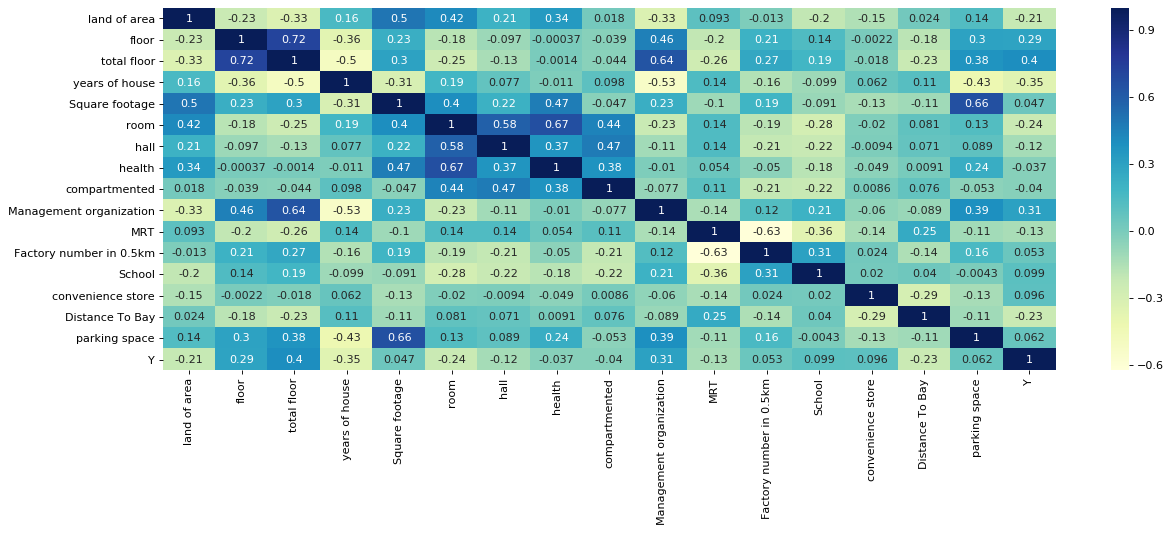

In [9]:
#觀察加入房屋價格曲log後變量之間的相關性
fig, ax = plt.subplots(figsize=(18,6), dpi=80)
sns.heatmap(dff.loc[:,'land of area':'Y'].corr(), cmap="YlGnBu",annot=True)
#plt.title('Correlation Matrix between the Inputs ')
plt.savefig('Zhonghe.png')

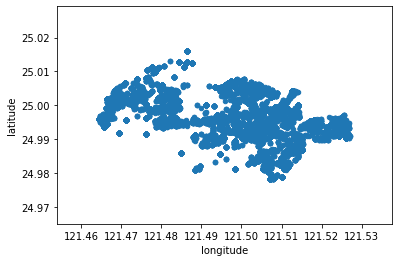

In [24]:
#整體中和區房屋交易資料地理位置分佈圖
dff.plot(kind="scatter",x="longitude",y="latitude")


# 選取重劃區資料

In [16]:
dff1=dff[dff.loc[:,"longitude"]> 121.484018] 
dff1.shape

(13729, 32)

In [17]:
dff2=dff1[dff1.loc[:,"longitude"]< 121.491950] 
dff2.shape

(1723, 32)

In [18]:
dff3=dff2[dff2.loc[:,"latitude"]> 25.008175] 
dff3.shape

(915, 32)

In [19]:
dff4=dff3[dff2.loc[:,"latitude"]< 25.013609] 
dff4.shape

/Users/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(866, 32)

In [20]:
dff4

,ID,The villages and towns urban district,transaction sign,building sector house number plate,address,longitude,latitude,land of area,the use zoning or compiles and checks,A.D. transaction year,...,compartmented,Management organization,MRT,Factory number in 0.5km,School,convenience store,Distance To Bay,parking space,Y,logY
511,540,中和區,房地(土地+建物)+車位,新北市中和區中原二街121~150號,新北市中和區中原里7鄰中原二街166號,121.486282,25.012496,14.501850,住,2013/11/25,...,1,1,0.518877,409,0.478939,1,0.274320,1,47.089040,3.873054
512,541,中和區,房地(土地+建物)+車位,新北市中和區中原二街121~150號,新北市中和區中原里7鄰中原二街166號,121.486282,25.012496,12.931875,住,2013/11/25,...,1,1,0.518877,409,0.478939,1,0.274320,1,46.722241,3.865398
513,542,中和區,房地(土地+建物)+車位,新北市中和區中原二街121~150號,新北市中和區中原里7鄰中原二街166號,121.486282,25.012496,14.501850,住,2013/11/25,...,1,1,0.518877,409,0.478939,1,0.274320,1,43.009684,3.784410
514,543,中和區,房地(土地+建物)+車位,新北市中和區中原二街121~150號,新北市中和區中原里7鄰中原二街166號,121.486282,25.012496,12.931875,住,2013/11/25,...,1,1,0.518877,409,0.478939,1,0.274320,1,50.006232,3.931948
515,544,中和區,房地(土地+建物)+車位,新北市中和區中原二街121~150號,新北市中和區中原里7鄰中原二街166號,121.486282,25.012496,12.931875,住,2013/11/25,...,1,1,0.518877,409,0.478939,1,0.274320,1,44.781700,3.823884
516,545,中和區,房地(土地+建物)+車位,新北市中和區中原二街121~150號,新北市中和區中原里7鄰中原二街166號,121.486282,25.012496,12.931875,住,2013/11/25,...,1,1,0.518877,409,0.478939,1,0.274320,1,46.274424,3.855969
517,546,中和區,房地(土地+建物)+車位,新北市中和區中原二街121~150號,新北市中和區中原里7鄰中原二街166號,121.486282,25.012496,12.931875,住,2013/11/25,...,1,1,0.518877,409,0.478939,1,0.274320,1,48.140328,3.894680
518,547,中和區,房地(土地+建物)+車位,新北市中和區中原二街121~150號,新北市中和區中原里7鄰中原二街166號,121.486282,25.012496,12.931875,住,2013/11/25,...,1,1,0.518877,409,0.478939,1,0.274320,1,45.572844,3.841018
519,548,中和區,房地(土地+建物)+車位,新北市中和區中原二街121~150號,新北市中和區中原里7鄰中原二街166號,121.486282,25.012496,14.501850,住,2013/11/25,...,1,1,0.518877,409,0.478939,1,0.274320,1,48.123296,3.894333
556,585,中和區,房地(土地+建物)+車位,新北市中和區中原二街121~150號,新北市中和區中原里7鄰中原二街166號,121.486282,25.012496,14.501850,住,2013/11/25,...,1,1,0.518877,409,0.478939,1,0.274320,1,49.092221,3.913866


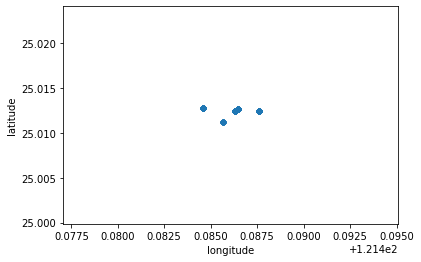

In [25]:
#中和重劃區房屋交易資料地理位置分佈圖
dff4.plot(kind="scatter",x="longitude",y="latitude")

In [26]:
#中和重劃區房價分佈
dff4["Y"].describe()

count    866.000000
mean      46.649283
std        6.479370
min       29.946945
25%       42.897312
50%       45.795893
75%       49.607131
max       69.385719
Name: Y, dtype: float64

<Figure size 432x288 with 0 Axes>

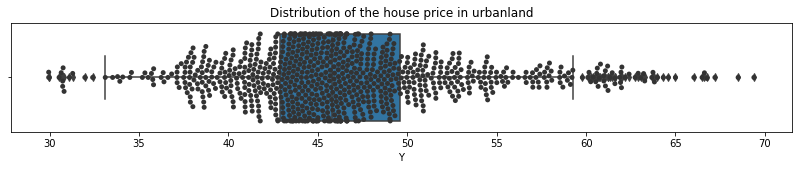

In [454]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(14,2)) 
sns.boxplot(dff4.loc[:,"Y"])
sns.swarmplot(dff4.loc[:,"Y"], color='.20')
plt.title('Distribution of the house price in urbanland')
plt.savefig('中和.png')

### 中和重劃區房屋特徵統計量

In [392]:
#刪除ID,longitude,latitude欄位
columns = ['ID','longitude','latitude']
dff4=dff4.drop(columns, axis=1)

In [29]:
dff4.describe().astype(np.int64).T

,count,mean,std,min,25%,50%,75%,max
ID,866,8670,5823,540,2682,8288,13213,19644
longitude,866,121,0,121,121,121,121,121
latitude,866,25,0,25,25,25,25,25
land of area,866,12,4,5,9,12,15,31
floor,866,12,5,2,7,12,17,26
total floor,866,21,4,14,23,23,24,26
years of house,866,0,1,0,0,0,1,4
Square footage,866,72,22,35,59,68,86,169
room,866,2,1,0,2,3,3,5
hall,866,1,0,0,1,1,2,3


In [30]:
#僅顯示數值型的變數
dff4.describe(include=['float'])

,longitude,latitude,land of area,Square footage,MRT,School,Distance To Bay,Y,logY
count,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000
mean,121.485928,25.012561,12.925891,72.142390,0.522490,0.445372,0.300185,46.649283,3.854873
std,0.000991,0.000262,4.061558,22.244962,0.037234,0.098579,0.080340,6.479370,0.133726
min,121.484560,25.011251,5.517600,35.180750,0.365673,0.308140,0.166528,29.946945,3.432274
25%,121.484560,25.012496,9.731425,59.689300,0.505515,0.308140,0.246218,42.897312,3.781853
50%,121.486282,25.012496,12.469050,68.501125,0.518877,0.478939,0.274320,45.795893,3.845795
75%,121.486473,25.012760,15.484975,86.016631,0.544380,0.488490,0.403869,49.607131,3.924092
max,121.487581,25.012760,31.072800,169.911225,0.586365,0.610029,0.413133,69.385719,4.253990


In [31]:
dff4.describe(include=['int'])

,ID,floor,total floor,years of house,room,hall,health,compartmented,Management organization,Factory number in 0.5km,convenience store,parking space
count,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000
mean,8670.959584,12.207852,21.557737,0.793303,2.613164,1.399538,1.978060,0.968822,0.700924,376.099307,1.331409,0.989607
std,5823.654947,5.869938,4.021562,1.094390,1.095134,0.568702,0.888321,0.173899,0.458118,40.764450,0.470992,0.101472
min,540.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,327.000000,1.000000,0.000000
25%,2682.500000,7.000000,23.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,327.000000,1.000000,1.000000
50%,8288.000000,12.000000,23.000000,0.000000,3.000000,1.000000,2.000000,1.000000,1.000000,371.000000,1.000000,1.000000
75%,13213.750000,17.000000,24.000000,1.000000,3.000000,2.000000,2.000000,1.000000,1.000000,409.000000,2.000000,1.000000
max,19644.000000,26.000000,26.000000,4.000000,5.000000,3.000000,5.000000,1.000000,1.000000,507.000000,2.000000,1.000000


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

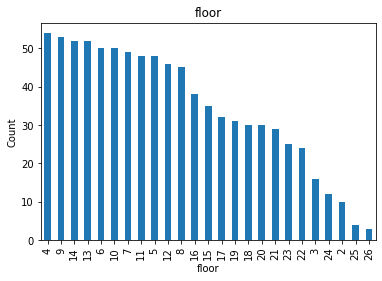

In [396]:
dff4['floor'].value_counts().plot(kind='bar')
plt.title('floor')
plt.xlabel('floor')
plt.ylabel('Count')
sns.despine

In [32]:
#刪除欄位
columns = ['Y']
dff4=dff4.drop(columns, axis=1)
dff4

,ID,The villages and towns urban district,transaction sign,building sector house number plate,address,longitude,latitude,land of area,the use zoning or compiles and checks,A.D. transaction year,...,health,compartmented,Management organization,MRT,Factory number in 0.5km,School,convenience store,Distance To Bay,parking space,logY
511,540,中和區,房地(土地+建物)+車位,新北市中和區中原二街121~150號,新北市中和區中原里7鄰中原二街166號,121.486282,25.012496,14.501850,住,2013/11/25,...,2,1,1,0.518877,409,0.478939,1,0.274320,1,3.873054
512,541,中和區,房地(土地+建物)+車位,新北市中和區中原二街121~150號,新北市中和區中原里7鄰中原二街166號,121.486282,25.012496,12.931875,住,2013/11/25,...,2,1,1,0.518877,409,0.478939,1,0.274320,1,3.865398
513,542,中和區,房地(土地+建物)+車位,新北市中和區中原二街121~150號,新北市中和區中原里7鄰中原二街166號,121.486282,25.012496,14.501850,住,2013/11/25,...,2,1,1,0.518877,409,0.478939,1,0.274320,1,3.784410
514,543,中和區,房地(土地+建物)+車位,新北市中和區中原二街121~150號,新北市中和區中原里7鄰中原二街166號,121.486282,25.012496,12.931875,住,2013/11/25,...,2,1,1,0.518877,409,0.478939,1,0.274320,1,3.931948
515,544,中和區,房地(土地+建物)+車位,新北市中和區中原二街121~150號,新北市中和區中原里7鄰中原二街166號,121.486282,25.012496,12.931875,住,2013/11/25,...,2,1,1,0.518877,409,0.478939,1,0.274320,1,3.823884
516,545,中和區,房地(土地+建物)+車位,新北市中和區中原二街121~150號,新北市中和區中原里7鄰中原二街166號,121.486282,25.012496,12.931875,住,2013/11/25,...,2,1,1,0.518877,409,0.478939,1,0.274320,1,3.855969
517,546,中和區,房地(土地+建物)+車位,新北市中和區中原二街121~150號,新北市中和區中原里7鄰中原二街166號,121.486282,25.012496,12.931875,住,2013/11/25,...,2,1,1,0.518877,409,0.478939,1,0.274320,1,3.894680
518,547,中和區,房地(土地+建物)+車位,新北市中和區中原二街121~150號,新北市中和區中原里7鄰中原二街166號,121.486282,25.012496,12.931875,住,2013/11/25,...,2,1,1,0.518877,409,0.478939,1,0.274320,1,3.841018
519,548,中和區,房地(土地+建物)+車位,新北市中和區中原二街121~150號,新北市中和區中原里7鄰中原二街166號,121.486282,25.012496,14.501850,住,2013/11/25,...,2,1,1,0.518877,409,0.478939,1,0.274320,1,3.894333
556,585,中和區,房地(土地+建物)+車位,新北市中和區中原二街121~150號,新北市中和區中原里7鄰中原二街166號,121.486282,25.012496,14.501850,住,2013/11/25,...,2,1,1,0.518877,409,0.478939,1,0.274320,1,3.913866


## 匯出距離中和重劃區資料
dff4.to_csv('tsetallurbanland.csv',encoding='utf-8',sep=",")

# 特徵分析
相關係數，是一個介於-1到1之間的索引。
當該值接近零時，就沒有線性關係。隨著相關性接近正負1，關係更強。值1（或負數1）表示兩個變量之間具有完美的線性關係。
讓我們找到數據集中變量之間的相關性。

Text(0.5, 1, 'correlation matrix between the inputs in Zhonghe urban land ')

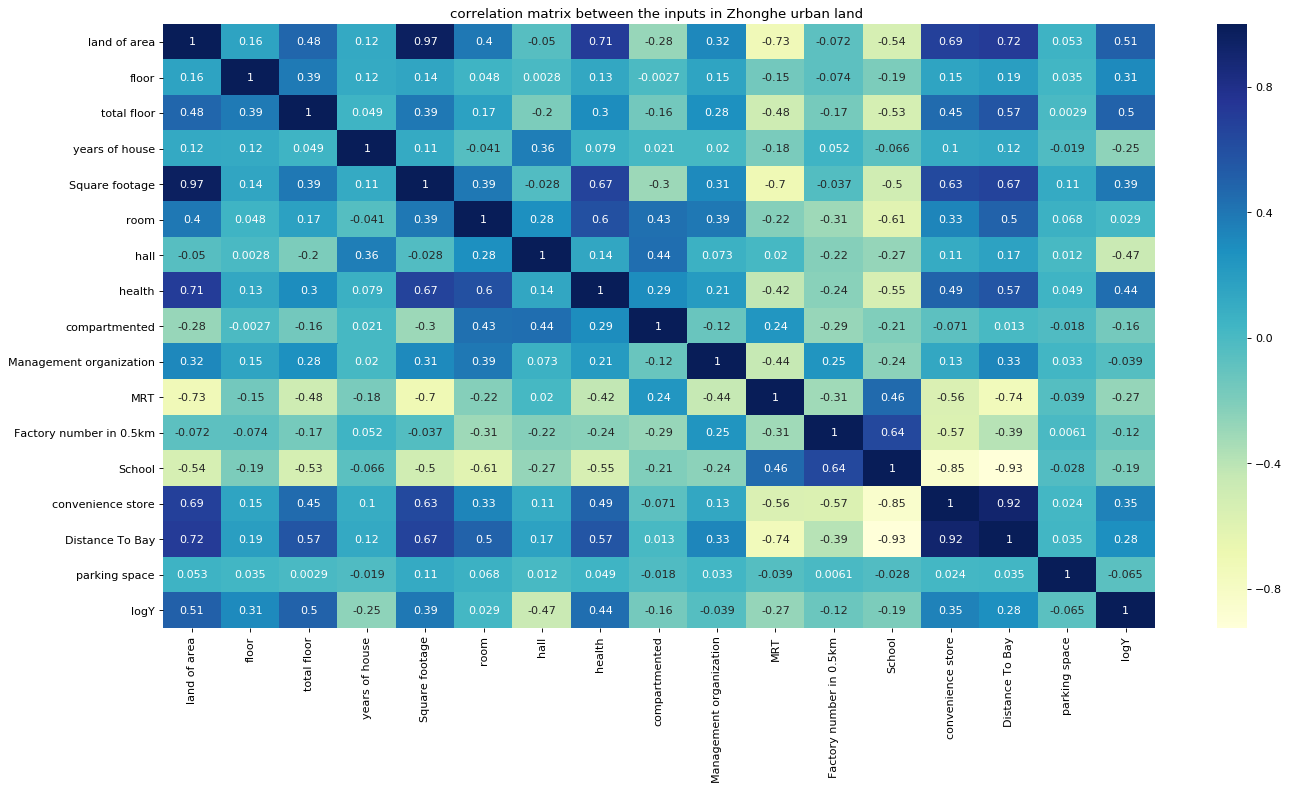

In [33]:
#刪除那些空值變數後
fig, ax = plt.subplots(figsize=(20,10), dpi=80)
sns.heatmap(dff4.loc[:,'land of area':'logY'].corr(), cmap="YlGnBu",annot=True)
plt.title('correlation matrix between the inputs in Zhonghe urban land ')

## 線性迴歸
- 僅選擇模型的重要變量。 Scikit-learn是繪製線性回歸的一種好方法，但是如果我們出於建模目的考慮線性回歸，那麼我們需要知道關於假設的變量的重要性。因此我們需要計算每個變量的p值，如果該值小於所需的臨界值為顯著（對於95％的顯著性，0.05是一般臨界值）。
### statsmodels套件為將數據放入模型之前分析數據的好方法。而Sklearn中OLS模型中，可以使數據進行擬合和預測。

### 房屋特徵：土地坪數、樓層、總樓層數、屋齡、坪數、房間數、客廳數、廁所數、有無隔間、有無管理組織、捷運站、工廠數、學校、便利商店、河岸距離、有無車位、每坪單價

In [36]:
features = [ 'land of area','floor','total floor','years of house' , 'Square footage' ,'room','hall','health','compartmented','Management organization','MRT','Factory number in 0.5km','School','convenience store','Distance To Bay','parking space']
X = dff4 [ features ] #data.drop(['logY''ID'],axis=1)
y = dff4 [ 'logY' ]
#將資料分成訓練組及測試組
from sklearn.model_selection import train_test_split

#test_size代表測試組比例。random_state代表設定隨機種子，讓測試結果可被重複
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [37]:
print('No. of training data:', len(X_train))
print('No. of test data:', len(X_test))

No. of training data: 606
No. of test data: 260


In [38]:
features

['land of area',
 'floor',
 'total floor',
 'years of house',
 'Square footage',
 'room',
 'hall',
 'health',
 'compartmented',
 'Management organization',
 'MRT',
 'Factory number in 0.5km',
 'School',
 'convenience store',
 'Distance To Bay',
 'parking space']

### 利用Statsmodels做模型基本架構，獲得變數顯著性

In [39]:
import statsmodels.api as sm
from sklearn import preprocessing
predictor = sm.add_constant(X_train)# adding a constant添加常數
OLS = sm.OLS(y_train,predictor)
myfit = OLS.fit()
print(myfit.summary())

                            OLS Regression Results                            
Dep. Variable:                   logY   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     135.5
Date:                Tue, 10 Mar 2020   Prob (F-statistic):          9.52e-180
Time:                        17:44:16   Log-Likelihood:                 856.74
No. Observations:                 606   AIC:                            -1681.
Df Residuals:                     590   BIC:                            -1611.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

/Users/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [41]:
#載入線性迴歸，並訓練模型
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print('Intercept: \n', lm.intercept_)
print('Coefficients: \n', lm.coef_)

Intercept: 
 8.795203349154281
Coefficients: 
 [ 4.16615931e-02  4.69781458e-03  1.97583022e-03 -3.20351545e-02
 -6.32488168e-03 -6.02664126e-03 -6.87213379e-02  4.08687982e-02
  5.62409286e-02  9.51341683e-03 -6.35091883e+00 -7.35034967e-03
  2.57533708e+00 -3.61607489e-01  1.10259373e+00 -4.41383110e-02]


In [42]:
predictions = lm.predict(X_test)

In [43]:
def mape_vectorized(a, b): 
    mask = a != 0
    return (np.fabs(a-b)/a)[mask].mean()

In [44]:
#載入迴歸常見的評估指標
from sklearn import metrics

#Mean Absolute Error (MAE)代表平均誤差，公式為所有實際值及預測值相減的絕對值平均。
print(metrics.mean_absolute_error(y_test,predictions))
print(metrics.mean_squared_error(y_test,predictions))
Mape = mape_vectorized(y_test, predictions)
print(Mape)

0.05301813168989114
0.004554634600436871
0.01369397515521156


## 刪掉未顯著的變數（p-value>0.05）

In [45]:
features = [ 'land of area','floor','years of house' , 'Square footage' ,'hall','health','compartmented','MRT','Factory number in 0.5km','School','convenience store','Distance To Bay']
X = dff4 [ features ] #data.drop(['logY''ID'],axis=1)
y = dff4 [ 'logY' ]

In [46]:
features

['land of area',
 'floor',
 'years of house',
 'Square footage',
 'hall',
 'health',
 'compartmented',
 'MRT',
 'Factory number in 0.5km',
 'School',
 'convenience store',
 'Distance To Bay']

In [47]:
#test_size代表測試組比例。random_state代表設定隨機種子，讓測試結果可被重複
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)



In [48]:
#載入線性迴歸，並訓練模型
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
#取得截距。如果公式是y=a+bx，a即是截距
print(lm.intercept_)
print(lm.coef_ )

9.04030707020632
[ 4.40099237e-02  5.13342548e-03 -3.12361437e-02 -6.85068912e-03
 -7.16772095e-02  3.94382656e-02  3.02603677e-02 -6.64223131e+00
 -7.58629803e-03  2.62881564e+00 -3.83727298e-01  1.18635894e+00]


In [49]:
lm.coef_ .tolist()

[0.044009923675751766,
 0.005133425477948536,
 -0.031236143651695355,
 -0.00685068911653909,
 -0.07167720949323104,
 0.039438265629369626,
 0.0302603676568342,
 -6.642231306678101,
 -0.007586298026464307,
 2.628815638065853,
 -0.3837272984578711,
 1.186358944319801]

In [50]:
#取得迴歸係數，並用Data Frame顯示
lm.coef_
X_train.columns
cdf = pd.DataFrame(lm.coef_,X_train.columns,columns=['Coef'])
cdf

,Coef
land of area,0.044010
floor,0.005133
years of house,-0.031236
Square footage,-0.006851
hall,-0.071677
health,0.039438
compartmented,0.030260
MRT,-6.642231
Factory number in 0.5km,-0.007586
School,2.628816


### 使用測試組資料來預測結果(對測試數據進行預測)

In [51]:
predictions = lm.predict(X_test)
#predictions

In [52]:
#檢查實際值和預測值之間的差異
dfpredictions = pd.DataFrame({'Actual':y_test,'Predicted':predictions})
dfplot=dfpredictions.head(25)
dfplot

,Actual,Predicted
698,3.869340,3.814785
11146,3.796549,3.744885
11874,3.909917,3.854496
1047,3.962531,3.961139
16747,3.557868,3.508231
5619,3.797533,3.761059
7576,3.749324,3.830795
1728,3.840394,3.878952
6926,3.911970,3.859153
2382,3.844746,3.874239


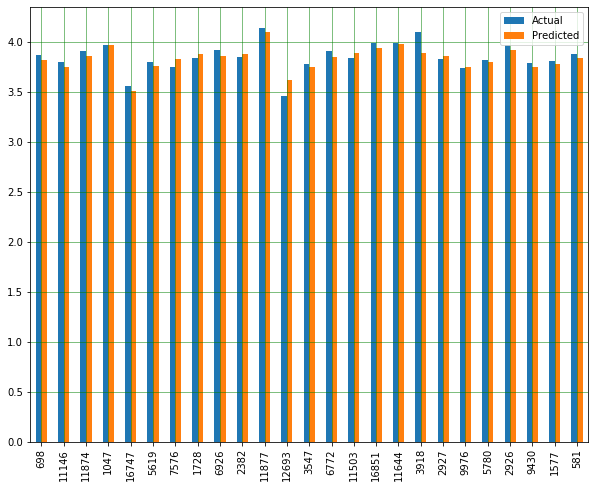

In [53]:
#我們繪製實際值和預測值的比較
dfplot.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

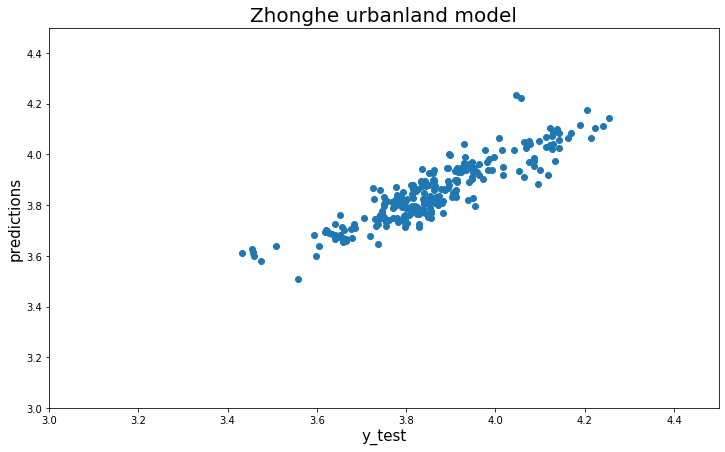

In [54]:
#比較實際房價及預測房價的關係 獲得了線性模型
#plt.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['axes.unicode_minus'] = False
plt.scatter(y_test,predictions)
#plt.plot([3.4,4.2],[3.4,4.2],'r')
plt.xlabel('y_test',fontsize=15)
plt.ylabel('predictions',fontsize=15)
plt.xlim([3.0, 4.5])
plt.ylim([3.0, 4.5])
plt.title('Zhonghe urbanland model',fontsize=20)
plt.savefig('Zhonghe urbanland.png')

Text(0.5, 1.0, 'urbanland Residual')

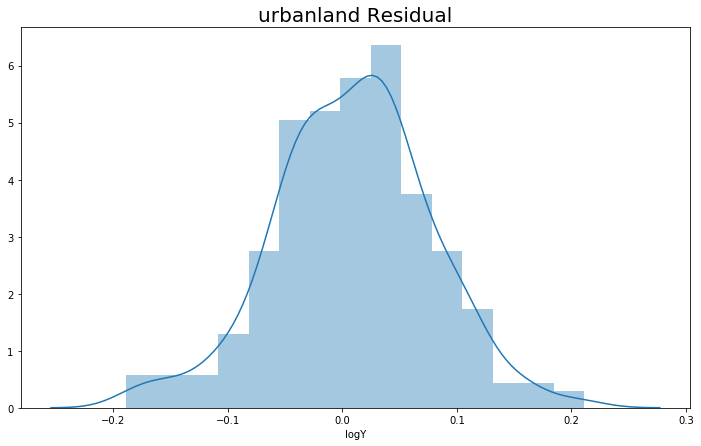

In [55]:
#看實際值及預測值之間的殘差分佈圖
sns.distplot((y_test-predictions))
plt.title('urbanland Residual',fontsize=20)
#殘差成常態

In [56]:
#載入迴歸常見的評估指標
from sklearn import metrics

#Mean Absolute Error (MAE)代表平均誤差，公式為所有實際值及預測值相減的絕對值平均。
metrics.mean_absolute_error(y_test,predictions)


0.05420459233143288

In [57]:
#Mean Squared Error 均方差(MSE)比起MSE？可以拉開誤差差距，算是蠻常用的指標，公式所有實際值及預測值相減的平方的平均
#表示誤差的平方的期望值
metrics.mean_squared_error(y_test,predictions)

0.00470976679203501

In [58]:
#Root Mean Squared Error (RMSE)代表MSE的平方根。比起MSE更為常用，因為更容易解釋y。
np.sqrt(metrics.mean_squared_error(y_test,predictions))

0.0686277406886968

In [59]:
def mape_vectorized(a, b): 
    mask = a != 0
    return (np.fabs(a-b)/a)[mask].mean()

In [60]:
Mape = mape_vectorized(y_test, predictions)
Mape

0.014021257880829986

In [61]:
#方差得分
r_squared = lm.score(X_test, y_test)
print(r_squared)
#檢視模型得分
#print('模型得分為',round(model.score(X_test,y_test),4))

0.8004356541632586


# PCA-1

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA 
from sklearn import datasets,metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

%matplotlib inline

In [75]:
features = [ 'land of area','floor','total floor','years of house' , 'Square footage' ,'room','hall','health','compartmented','Management organization','MRT','Factory number in 0.5km','School','convenience store','Distance To Bay','parking space']
X = dff4 [ features ] #data.drop(['logY''ID'],axis=1)
y = dff4 [ 'logY' ]

scale = StandardScaler()
normal_X = scale.fit_transform(X) 
X_train, X_test, y_train, y_test = train_test_split(normal_X, y, test_size=0.3, random_state=101)

In [81]:
#主成分PCA分析
# PCA
n_components = 4
pca = TruncatedSVD(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)

X_test_pca = pca.transform(X_test)

前4个主成分解释了数据中70.37%的变化


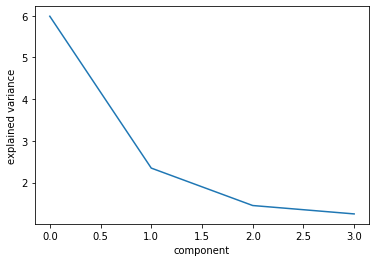

In [82]:
#可視化

components = pca.components_
plt.plot(pca.explained_variance_)
plt.xlabel('component')
plt.ylabel('explained variance')

print("前{}个主成分解释了数据中{:.2f}%的变化".format(n_components, sum(pca.explained_variance_ratio_)*100))

In [86]:
#比較PCA之前與之後線性回歸後的誤差結果比較

model = LinearRegression()
model.fit(X_train_pca, y_train)
print("前{}个PCA主成分进行线性回归的MSE是{}".format(n_components,
                                       metrics.mean_squared_error(y_test,model.predict(X_test_pca))))


前4个PCA主成分进行线性回归的MSE是0.013137283504484419


In [87]:
metrics.mean_absolute_error(y_test,model.predict(X_test_pca))

0.08719491461821142

In [88]:
Mape = mape_vectorized(y_test, model.predict(X_test_pca))
print(Mape)

0.022607745463312897


/Users/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  """


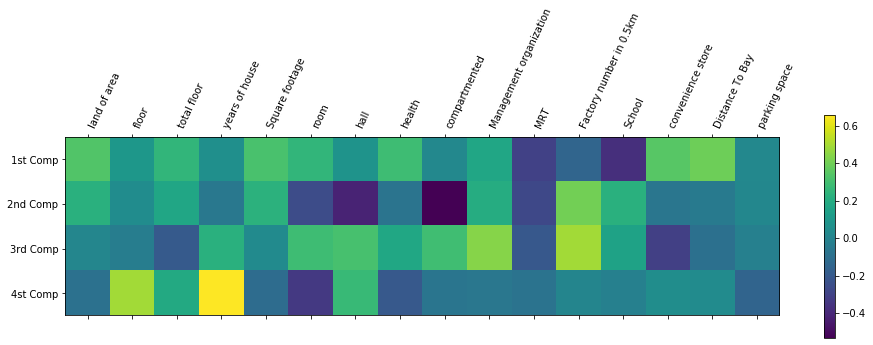

<Figure size 432x288 with 0 Axes>

In [90]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3,],['1st Comp','2nd Comp','3rd Comp','4st Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(features)),features,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 
plt.savefig('中和pca.png')

In [1260]:
# Dump components relations with features:
import pandas as pd
import pylab as pl
land=pd.DataFrame(pca.components_,columns=features,index = ['PC-1','PC-2','PC-3','PC-4'])

land.to_csv('/Users/caiyunan/Desktop/Result1.csv',float_format='%.5f') #保留两位小数
#print (pd.DataFrame(pca.components_,columns=features,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8']))


# MLP

In [16]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
np.random.seed(7)

/Users/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/anaconda3/lib/python3.6/site-packages/tensorflow/python/fr

### Load dataset

In [17]:
df = pd.read_csv("urbanland.csv")
df.head()

,land of area,floor,years of house,Square footage,building present situation pattern - hall,building present situation pattern - health,Transfer building present situation pattern - compartmented,MRT,Factory number in 0.5km,School,0.257-11,Distance To Bay,logY
0,14.501850,4,0,74.327275,1,2,1,0.518877,409,0.478939,1,0.27432,3.873054
1,12.931875,13,0,66.991650,1,2,1,0.518877,409,0.478939,1,0.27432,3.865398
2,14.501850,8,0,85.562125,1,2,1,0.518877,409,0.478939,1,0.27432,3.784410
3,12.931875,4,0,66.991650,1,2,1,0.518877,409,0.478939,1,0.27432,3.931948
4,12.931875,10,0,66.991650,1,2,1,0.518877,409,0.478939,1,0.27432,3.823884


In [18]:
print("dataset shape = ",df.shape)

dataset shape =  (866, 13)


In [19]:
dataset = df.values
np.random.shuffle(dataset) # 把資料集洗牌
#print(dataset)

In [20]:
from sklearn.preprocessing import Normalizer

## Function of normalization and parsing

In [21]:
def normalize(x):
    x-=x.mean(axis=0)
    x/=x.std(axis=0)
    return x

def parseTrainAndTest(x,n):
    return x[:int(round((x.shape[0]*n),0))],x[int(round((x.shape[0]*0.8),0)):]

In [22]:
X = dataset[:,0:-1]
Y = dataset[:,-1]
X = normalize(X)

parseRate = 0.8
X_train, X_test = parseTrainAndTest(X,parseRate)
Y_train, Y_test = parseTrainAndTest(Y,parseRate)

In [23]:
X_train.shape[1]

12

# Function of model building
- 改這裡可以調整神經網路結構
- 透過 model.add(Dense(神經元數量,激發函數)) 來新增隱藏層

In [24]:
def build_model(neural_num):
    model = Sequential()
    model.add(Dense(32,input_shape = (X_train.shape[1],),activation = "relu")) # hidden layer
    model.add(Dense(neural_num,activation = "relu")) # hidden layer
    model.add(Dense(1)) # output layer
    model.compile(loss="mse",optimizer="adam",metrics=["mae"])
    return model

# Main function
- epochsNum 就是要訓練幾次的意思

In [55]:
epochsNum = 80
result =[]
for neural_num in range(16,32):
    print("***************** Neural num = ",neural_num,"*****************")
    model = build_model(neural_num)
    #model.summary()
    model.fit(X_train,Y_train,epochs = epochsNum,batch_size = 16,verbose = 0)
    mse,mae = model.evaluate(X_test,Y_test)
    result.append(mae)
    model.save('my_model%d.h5'% neural_num)
print(result) 
#print("min value occured in ",result.index(min(result)) ,"neurals",", value is : ",min(result))
print("min value occured in ",result.index(min(result)) +16,"neurals",", value is : ",min(result))

***************** Neural num =  16 *****************
173/173 [==============================] - 0s 2ms/step
***************** Neural num =  17 *****************
173/173 [==============================] - 0s 2ms/step
***************** Neural num =  18 *****************
173/173 [==============================] - 0s 2ms/step
***************** Neural num =  19 *****************
173/173 [==============================] - 0s 2ms/step
***************** Neural num =  20 *****************
173/173 [==============================] - 0s 2ms/step
***************** Neural num =  21 *****************
173/173 [==============================] - 0s 2ms/step
***************** Neural num =  22 *****************
173/173 [==============================] - 0s 2ms/step
***************** Neural num =  23 *****************
173/173 [==============================] - 0s 2ms/step
***************** Neural num =  24 *****************
173/173 [==============================] - 0s 2ms/step
***************** Neural num

### test function

In [56]:
model = keras.models.load_model('my_model20.h5')
mse,mae = model.evaluate(X_test,Y_test)
Y_pred = model.predict(X_test,batch_size = 10, verbose = 0)
print("Mean square error(MSE)",mse)
print("Mean absolute error(MAE) : ",mae)
#e^0.043=1.043萬

173/173 [==============================] - 0s 3ms/step
Mean square error(MSE) 0.004590352131807477
Mean absolute error(MAE) :  0.04977043095782313


# MAPE caculation

In [27]:
def mape_vectorized(a, b): 
    mask = a != 0
    return (np.fabs(a-b)/a)[mask].mean()

In [28]:
Y_test = Y_test.reshape(Y_pred.shape)
#print(Y_pred.shape)
#print(Y_test.shape)
mape = mape_vectorized(Y_test,Y_pred)
print("mape = ",mape)

mape =  0.01083151818501477


## 換tanh

In [136]:
def build_model(neural_num):
    model = Sequential()
    model.add(Dense(32,input_shape = (X_train.shape[1],),activation = "tanh")) # hidden layer
    model.add(Dense(neural_num,activation = "tanh")) # hidden layer
    model.add(Dense(1)) # output layer
    model.compile(loss="mse",optimizer="adam",metrics=["mae"])
    return model

In [137]:
epochsNum = 80
result =[]
for neural_num in range(16,33):
    print("***************** Neural num = ",neural_num,"*****************")
    model = build_model(neural_num)
    #model.summary()
    model.fit(X_train,Y_train,epochs = epochsNum,batch_size = 16,verbose = 0)
    mse,mae = model.evaluate(X_test,Y_test)
    result.append(mae)
    model.save('my_modeltrytanh%d.h5'% neural_num)
print(result) 
#print("min value occured in ",result.index(min(result)) ,"neurals",", value is : ",min(result))
print("min value occured in ",result.index(min(result)) +16,"neurals",", value is : ",min(result))

***************** Neural num =  16 *****************
173/173 [==============================] - 0s 1ms/step
***************** Neural num =  17 *****************
173/173 [==============================] - 0s 2ms/step
***************** Neural num =  18 *****************
173/173 [==============================] - 0s 2ms/step
***************** Neural num =  19 *****************
173/173 [==============================] - 0s 2ms/step
***************** Neural num =  20 *****************
173/173 [==============================] - 0s 2ms/step
***************** Neural num =  21 *****************
173/173 [==============================] - 0s 2ms/step
***************** Neural num =  22 *****************
173/173 [==============================] - 0s 2ms/step
***************** Neural num =  23 *****************
173/173 [==============================] - 0s 2ms/step
***************** Neural num =  24 *****************
173/173 [==============================] - 0s 2ms/step
***************** Neural num

In [138]:
model = keras.models.load_model('my_modeltrytanh30.h5')
mse,mae = model.evaluate(X_test,Y_test)
Y_pred = model.predict(X_test,batch_size = 10, verbose = 0)
print("Mean square error(MSE)",mse)
print("Mean absolute error(MAE) : ",mae)
#e^0.043=1.043萬

173/173 [==============================] - 0s 3ms/step
Mean square error(MSE) 0.003805320088164827
Mean absolute error(MAE) :  0.04491352345902107


In [139]:
Y_test = Y_test.reshape(Y_pred.shape)
#print(Y_pred.shape)
#print(Y_test.shape)
mape = mape_vectorized(Y_test,Y_pred)
print("mape = ",mape)

mape =  0.011629625583034542


# 選取重劃區外圍500公尺資料

In [19]:
dfm1=dff[dff.loc[:,"longitude"]> 121.481335] 
dfm1.shape

(14130, 32)

In [20]:
dfm2=dfm1[dfm1.loc[:,"longitude"]< 121.494467] 
dfm2.shape

(2800, 32)

In [21]:
dfm3=dfm2[dfm2.loc[:,"latitude"]> 25.003503] 
dfm3.shape

(1368, 32)

In [22]:
dfm4=dfm3[dfm3.loc[:,"latitude"]< 25.018244] 
dfm4.shape

(1368, 32)

In [23]:
dfm4

,ID,The villages and towns urban district,transaction sign,building sector house number plate,address,longitude,latitude,land of area,the use zoning or compiles and checks,A.D. transaction year,...,compartmented,Management organization,MRT,Factory number in 0.5km,School,convenience store,Distance To Bay,parking space,Y,logY
6,9,中和區,房地(土地+建物),新北市中和區中山路二段526巷15弄1~30號,新北市中和區中原里10鄰中山路二段526巷15弄6之1號,121.485510,25.005533,6.243600,工,2013/10/03,...,1,0,0.321246,654,0.852306,3,0.830369,0,31.186652,3.471552
98,108,中和區,房地(土地+建物),新北市中和區中山路二段526巷1~30號,新北市中和區中原里10鄰中山路二段526巷33之1號,121.485792,25.005914,9.114325,工,2013/10/21,...,1,0,0.297236,675,0.904842,3,0.779321,0,22.038567,3.137170
226,243,中和區,房地(土地+建物),新北市中和區中正路877巷1~30號,新北市中和區平河里27鄰中正路877巷4之1號,121.484111,25.004101,9.946200,住,2013/10/16,...,1,0,0.458037,376,0.636345,6,1.051400,0,24.364572,3.233353
331,355,中和區,房地(土地+建物)+車位,新北市中和區板南路661~690號,新北市中和區中原里20鄰板南路685號,121.483073,25.008446,7.783325,工,2013/10/08,...,0,0,0.152112,709,0.696800,2,0.835135,1,39.371374,3.698121
497,526,中和區,房地(土地+建物),新北市中和區橋和路160巷1~30號,新北市中和區中原里23鄰橋和路160巷48號,121.494452,25.005128,4.371125,住,2013/11/06,...,1,1,0.401276,368,0.987478,6,0.089726,0,36.882607,3.634492
511,540,中和區,房地(土地+建物)+車位,新北市中和區中原二街121~150號,新北市中和區中原里7鄰中原二街166號,121.486282,25.012496,14.501850,住,2013/11/25,...,1,1,0.518877,409,0.478939,1,0.274320,1,47.089040,3.873054
512,541,中和區,房地(土地+建物)+車位,新北市中和區中原二街121~150號,新北市中和區中原里7鄰中原二街166號,121.486282,25.012496,12.931875,住,2013/11/25,...,1,1,0.518877,409,0.478939,1,0.274320,1,46.722241,3.865398
513,542,中和區,房地(土地+建物)+車位,新北市中和區中原二街121~150號,新北市中和區中原里7鄰中原二街166號,121.486282,25.012496,14.501850,住,2013/11/25,...,1,1,0.518877,409,0.478939,1,0.274320,1,43.009684,3.784410
514,543,中和區,房地(土地+建物)+車位,新北市中和區中原二街121~150號,新北市中和區中原里7鄰中原二街166號,121.486282,25.012496,12.931875,住,2013/11/25,...,1,1,0.518877,409,0.478939,1,0.274320,1,50.006232,3.931948
515,544,中和區,房地(土地+建物)+車位,新北市中和區中原二街121~150號,新北市中和區中原里7鄰中原二街166號,121.486282,25.012496,12.931875,住,2013/11/25,...,1,1,0.518877,409,0.478939,1,0.274320,1,44.781700,3.823884


### 將兩dataframe資料相減
dataframe1=dataframe1.append(dataframe2).drop_duplicates(keep=False)

In [24]:
df500m4=dfm4.append(dff4).drop_duplicates(keep=False)
df500m4.shape

(502, 32)

In [25]:
df500m4["Y"].describe()

count    502.000000
mean      36.764463
std        6.636769
min        7.632477
25%       34.672538
50%       37.118060
75%       40.887507
max       63.941685
Name: Y, dtype: float64

Text(0.5, 1.0, 'Distribution of the house price in urbanland(500m)')

<Figure size 432x288 with 0 Axes>

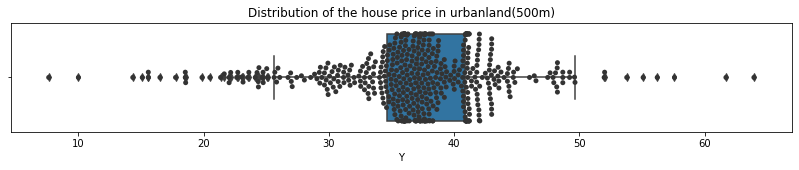

In [26]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(14,2)) 
sns.boxplot(df500m4.loc[:,"Y"])
sns.swarmplot(df500m4.loc[:,"Y"], color='.20')
plt.title('Distribution of the house price in urbanland(500m)')

## 離群值處理
### 移除掉小於Q1Q3的

In [27]:
# Outlier detection 
import pandas as pd
import numpy as np
from collections import Counter

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step)| (df[col] > Q3 + outlier_step )].index
        #outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(df500m4,0,['Y'])
#Outliers_to_drop

In [28]:
# Drop outliers
df500m4 = df500m4.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [29]:
df500m4.shape

(460, 32)

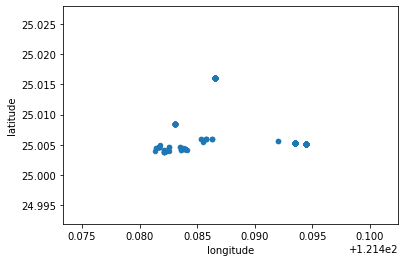

In [30]:
df500m4.plot(kind="scatter",x="longitude",y="latitude")

<Figure size 432x288 with 0 Axes>

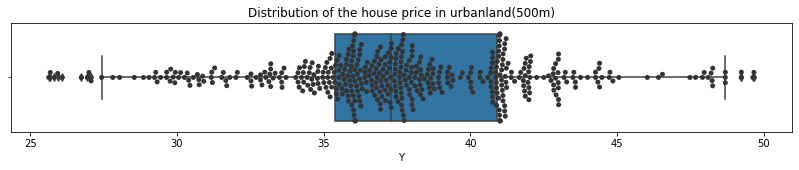

In [504]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(14,2)) 
sns.boxplot(df500m4.loc[:,"Y"])
sns.swarmplot(df500m4.loc[:,"Y"], color='.20')
plt.title('Distribution of the house price in urbanland(500m)')
plt.savefig('中和近區.png')

In [505]:
#僅顯示數值型的變數
df500m4.describe(include=['float'])

,longitude,latitude,land of area,Square footage,MRT,School,Distance To Bay,Y,logY
count,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000
mean,121.491374,25.006467,5.582736,37.400890,0.434527,0.943935,0.260320,37.610792,3.646819
std,0.004090,0.003365,2.666085,15.556490,0.170305,0.224513,0.330855,4.430671,0.116885
min,121.481365,25.003861,1.255375,10.167025,0.152112,0.464885,0.004800,25.632262,3.282123
25%,121.486554,25.005317,3.917375,24.215881,0.376084,0.936298,0.156599,35.372490,3.593813
50%,121.493520,25.005317,4.631275,37.083475,0.376084,1.084235,0.156599,37.302855,3.645524
75%,121.493520,25.005317,7.405200,48.063469,0.401276,1.084235,0.156599,40.898455,3.735249
max,121.494452,25.015996,21.120550,98.469800,0.896654,1.247913,1.298912,49.656881,3.925075


In [506]:
#僅顯示數值型的變數
df500m4.describe(include=['int'])

,ID,floor,total floor,years of house,room,hall,health,compartmented,Management organization,Factory number in 0.5km,convenience store,parking space
count,460.000000,460.000000,460.000000,460.000000,460.00000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000
mean,13256.832609,7.584783,12.682609,7.532609,0.91087,0.602174,0.591304,0.393478,0.860870,359.193478,3.223913,0.556522
std,3956.946636,3.777497,3.283172,12.854008,1.32460,0.853288,0.867176,0.489053,0.346459,143.956434,1.591054,0.497336
min,9.000000,1.000000,4.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000
25%,12973.750000,4.000000,13.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,368.000000,3.000000,0.000000
50%,13635.500000,8.000000,14.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,395.000000,3.000000,1.000000
75%,15379.500000,11.000000,14.000000,16.000000,2.00000,1.000000,1.000000,1.000000,1.000000,395.000000,3.000000,1.000000
max,19588.000000,15.000000,18.000000,47.000000,6.00000,5.000000,5.000000,1.000000,1.000000,711.000000,6.000000,1.000000


### 刪除欄位

In [507]:
#刪除欄位
columns = ['ID','longitude','latitude']
df500m4=df500m4.drop(columns, axis=1)

In [508]:
df500m4.describe().astype(np.int64).T

,count,mean,std,min,25%,50%,75%,max
land of area,460,5,2,1,3,4,7,21
floor,460,7,3,1,4,8,11,15
total floor,460,12,3,4,13,14,14,18
years of house,460,7,12,0,0,0,16,47
Square footage,460,37,15,10,24,37,48,98
room,460,0,1,0,0,0,2,6
hall,460,0,0,0,0,0,1,5
health,460,0,0,0,0,0,1,5
compartmented,460,0,0,0,0,0,1,1
Management organization,460,0,0,0,1,1,1,1


In [509]:
#刪除欄位
columns = ['Y']
df500m4=df500m4.drop(columns, axis=1)
df500m4

,The villages and towns urban district,transaction sign,building sector house number plate,address,land of area,the use zoning or compiles and checks,A.D. transaction year,transaction pen number,floor,total floor,...,health,compartmented,Management organization,MRT,Factory number in 0.5km,School,convenience store,Distance To Bay,parking space,logY
0,中和區,房地(土地+建物),新北市中和區中山路二段526巷15弄1~30號,新北市中和區中原里10鄰中山路二段526巷15弄6之1號,6.243600,工,2013/10/03,土地1建物1車位0,4,4,...,3,1,0,0.321246,654,0.852306,3,0.830369,0,3.471552
1,中和區,房地(土地+建物)+車位,新北市中和區板南路661~690號,新北市中和區中原里20鄰板南路685號,7.783325,工,2013/10/08,土地1建物1車位1,2,18,...,0,0,0,0.152112,709,0.696800,2,0.835135,1,3.698121
2,中和區,房地(土地+建物),新北市中和區橋和路160巷1~30號,新北市中和區中原里23鄰橋和路160巷48號,4.371125,住,2013/11/06,土地1建物1車位0,8,14,...,2,1,1,0.401276,368,0.987478,6,0.089726,0,3.634492
3,中和區,房地(土地+建物),新北市中和區橋和路160巷31~60號,新北市中和區中原里23鄰橋和路160巷48號,2.093300,住,2013/11/11,土地1建物1車位0,13,14,...,1,1,1,0.401276,368,0.987478,6,0.089726,0,3.772729
4,中和區,房地(土地+建物),新北市中和區橋和路160巷1~30號,新北市中和區中原里23鄰橋和路160巷48號,4.631275,住,2013/12/01,土地1建物1車位0,13,14,...,2,1,1,0.401276,368,0.987478,6,0.089726,0,3.655178
5,中和區,房地(土地+建物),新北市中和區中山路二段449巷1弄1~30號,新北市中和區平河里26鄰中山路二段449巷1弄1之1號,7.777275,住,2013/11/15,土地2建物1車位0,3,4,...,1,1,0,0.443973,353,0.641606,6,1.056600,0,3.386034
6,中和區,房地(土地+建物),新北市中和區橋和路160巷31~60號,新北市中和區中原里23鄰橋和路160巷48號,1.255375,住,2013/12/02,土地1建物2車位0,9,14,...,1,1,1,0.401276,368,0.987478,6,0.089726,0,3.812440
7,中和區,房地(土地+建物)+車位,新北市中和區橋安街1~30號,新北市中和區中原里11鄰橋安街41號,10.587500,工,2013/12/10,土地1建物1車位1,7,13,...,1,0,1,0.214500,462,1.247913,4,0.264289,1,3.532068
8,中和區,房地(土地+建物),新北市中和區中山路二段526巷1~30號,新北市中和區中原里10鄰中山路二段526巷33之1號,6.467450,工,2013/12/16,土地1建物1車位0,4,4,...,2,1,0,0.297236,675,0.904842,3,0.779321,0,3.617165
9,中和區,房地(土地+建物),新北市中和區中山路二段449巷1弄1~30號,新北市中和區平河里26鄰中山路二段449巷1弄1之1號,9.123400,住,2014/02/10,土地2建物1車位0,4,4,...,1,1,0,0.443973,353,0.641606,6,1.056600,0,3.360862


# 特徵分析
相關係數，是一個介於-1到1之間的索引。
當該值接近零時，就沒有線性關係。隨著相關性接近正負1，關係更強。值1（或負數1）表示兩個變量之間具有完美的線性關係。
讓我們找到數據集中變量之間的相關性。

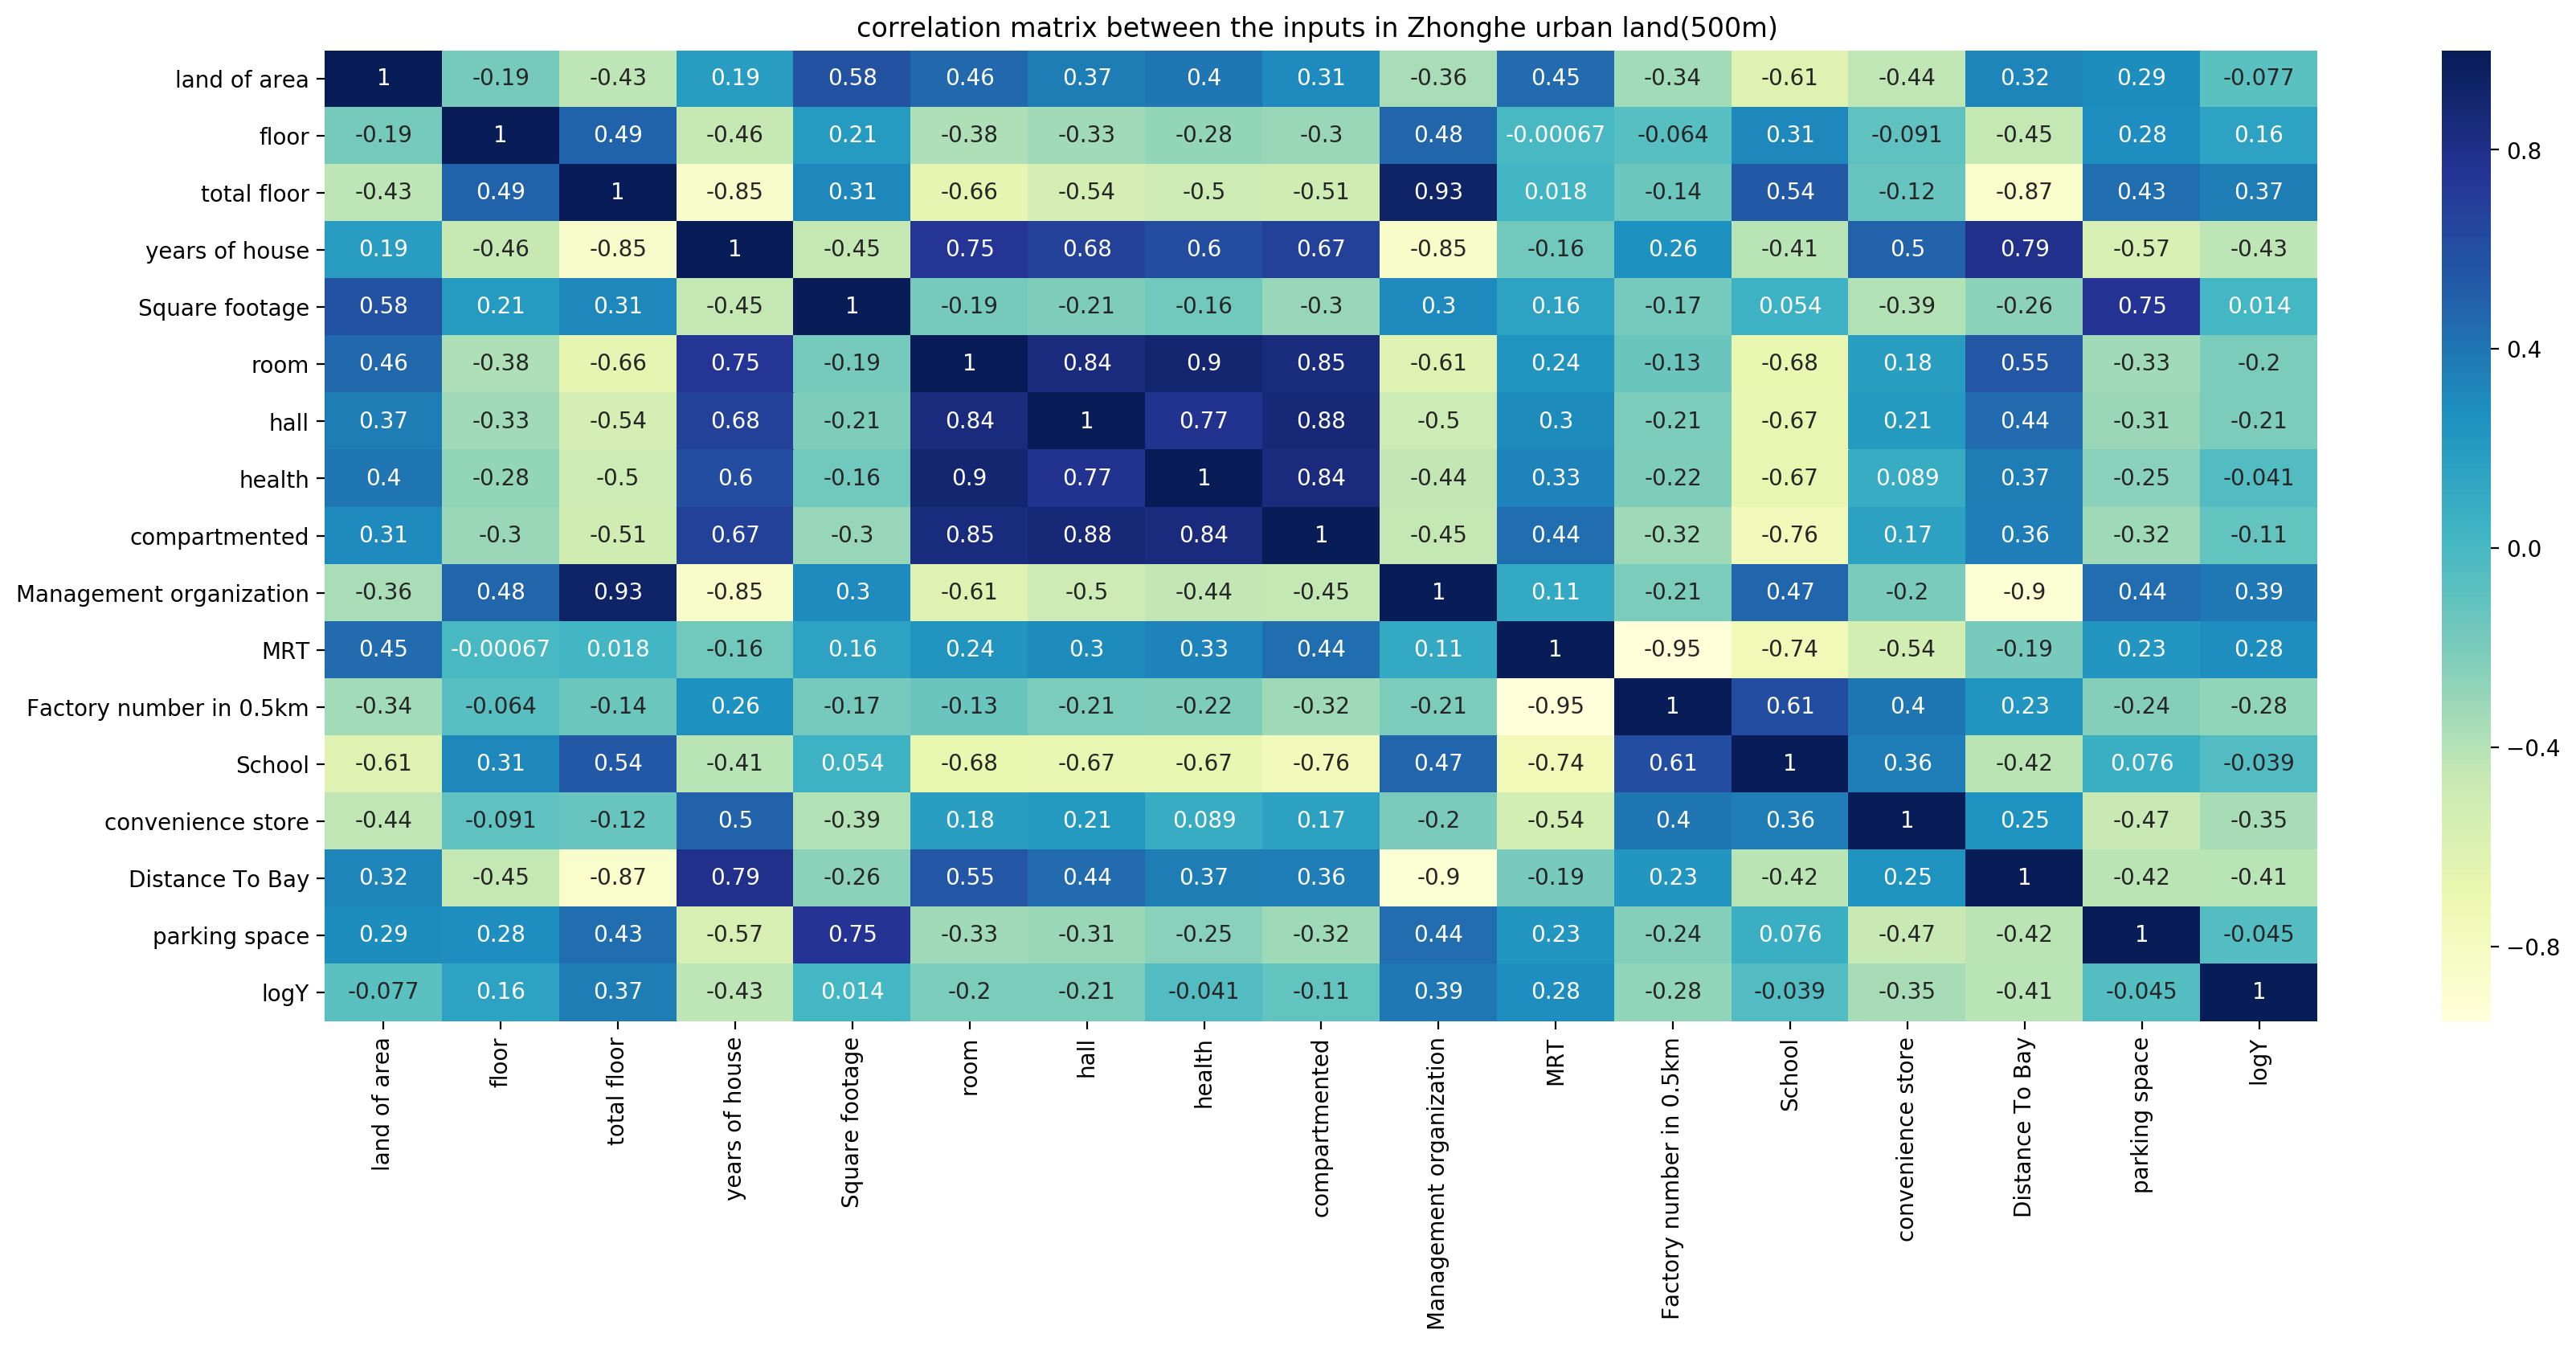

In [510]:
fig, ax = plt.subplots(figsize=(20,8), dpi=200)
sns.heatmap(df500m4.loc[:,'land of area':'logY'].corr(), cmap="YlGnBu",annot=True)
plt.title('correlation matrix between the inputs in Zhonghe urban land(500m) ')
plt.savefig('Banqiao1.png')

## 線性迴歸 

In [202]:
features = [ 'land of area','floor','total floor','years of house' , 'Square footage' ,'room','hall','health','compartmented','Management organization','MRT','Factory number in 0.5km','School','convenience store','Distance To Bay','parking space']
X = df500m4 [ features ] #data.drop(['logY''ID'],axis=1)
y = df500m4 [ 'logY' ]
#將資料分成訓練組及測試組
from sklearn.model_selection import train_test_split

#test_size代表測試組比例。random_state代表設定隨機種子，讓測試結果可被重複
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [203]:
features

['land of area',
 'floor',
 'total floor',
 'years of house',
 'Square footage',
 'room',
 'hall',
 'health',
 'compartmented',
 'Management organization',
 'MRT',
 'Factory number in 0.5km',
 'School',
 'convenience store',
 'Distance To Bay',
 'parking space']

In [204]:
print('No. of training data:', len(X_train))
print('No. of test data:', len(X_test))

No. of training data: 322
No. of test data: 138


### 利用Statsmodels做模型基本架構，獲得變數顯著性

In [205]:
import statsmodels.api as sm
from sklearn import preprocessing
predictor = sm.add_constant(X_train)# adding a constant添加常數
OLS = sm.OLS(y_train,predictor)
myfit = OLS.fit()
print(myfit.summary())

                            OLS Regression Results                            
Dep. Variable:                   logY   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     20.96
Date:                Sat, 18 Jan 2020   Prob (F-statistic):           3.83e-40
Time:                        16:50:50   Log-Likelihood:                 343.56
No. Observations:                 322   AIC:                            -653.1
Df Residuals:                     305   BIC:                            -589.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

/Users/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [207]:
#載入線性迴歸，並訓練模型
#載入線性迴歸，並訓練模型
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print('Intercept: \n', lm.intercept_)
print('Coefficients: \n', lm.coef_)

Intercept: 
 4.232878379097136
Coefficients: 
 [ 1.19268126e-02  4.52483484e-04  6.57739730e-03 -4.96871725e-03
 -1.02201462e-03 -2.28528726e-02 -3.53474872e-02  5.06094581e-02
 -1.04227551e-01  5.97069248e-03 -1.07001376e-01  2.55914204e-04
 -6.39261414e-01  1.90644186e-02 -2.10244765e-01 -1.26226301e-01]


## 刪掉未顯著的變數

In [208]:
features = [ 'years of house' ,'hall','health','compartmented','School','Distance To Bay','parking space']
X = df500m4 [ features ] #data.drop(['logY''ID'],axis=1)
y = df500m4 [ 'logY' ]

In [209]:
features

['years of house',
 'hall',
 'health',
 'compartmented',
 'School',
 'Distance To Bay',
 'parking space']

In [210]:
#test_size代表測試組比例。random_state代表設定隨機種子，讓測試結果可被重複
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#載入線性迴歸，並訓練模型
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
#取得截距。如果公式是y=a+bx，a即是截距
print(lm.intercept_)
print(lm.coef_ )

4.107314929087726
[-0.00347462 -0.03577736  0.04152224 -0.08996156 -0.31113639 -0.17264849
 -0.12363842]


In [211]:
#取得迴歸係數，並用Data Frame顯示
lm.coef_
X_train.columns
cdf = pd.DataFrame(lm.coef_,X_train.columns,columns=['Coef'])
cdf

,Coef
years of house,-0.003475
hall,-0.035777
health,0.041522
compartmented,-0.089962
School,-0.311136
Distance To Bay,-0.172648
parking space,-0.123638


### 使用測試組資料來預測結果(對測試數據進行預測)


In [212]:
predictions = lm.predict(X_test)
#predictions

In [213]:
#檢查實際值和預測值之間的差異
dfpredictions = pd.DataFrame({'Actual':y_test,'Predicted':predictions})
dfplot=dfpredictions.head(25)
dfplot

,Actual,Predicted
95,3.583053,3.619295
302,3.570549,3.619295
106,3.737951,3.742933
379,3.598008,3.615820
19,3.744417,3.648248
154,3.607882,3.619295
237,3.649164,3.619295
257,3.739744,3.742933
400,3.784266,3.739459
310,3.815492,3.795511


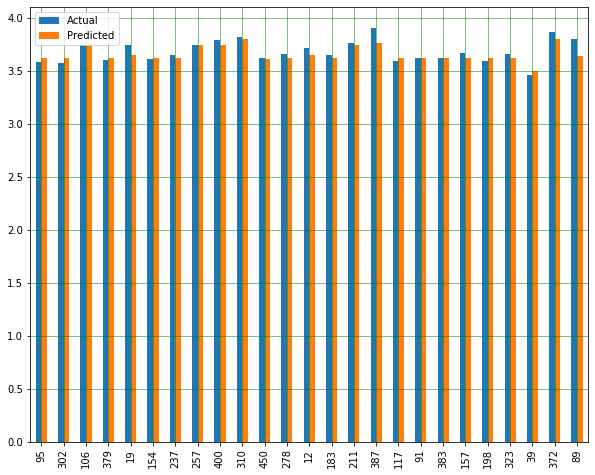

In [214]:
#我們繪製實際值和預測值的比較
dfplot.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

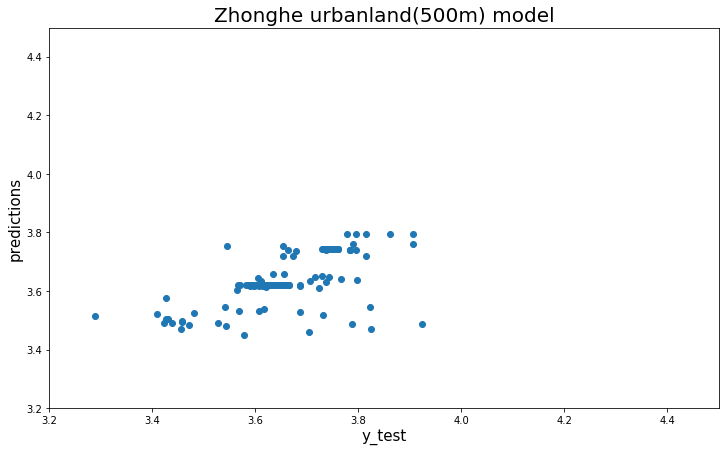

In [215]:
#比較實際房價及預測房價的關係
plt.scatter(y_test,predictions)
plt.xlabel('y_test',fontsize=15)
plt.ylabel('predictions',fontsize=15)
plt.xlim([3.2, 4.5])
plt.ylim([3.2, 4.5])
plt.title('Zhonghe urbanland(500m) model',fontsize=20)
plt.savefig('Zhonghe urbanland(500m).png')

Text(0.5, 1.0, 'urbanland(500m) Residual')

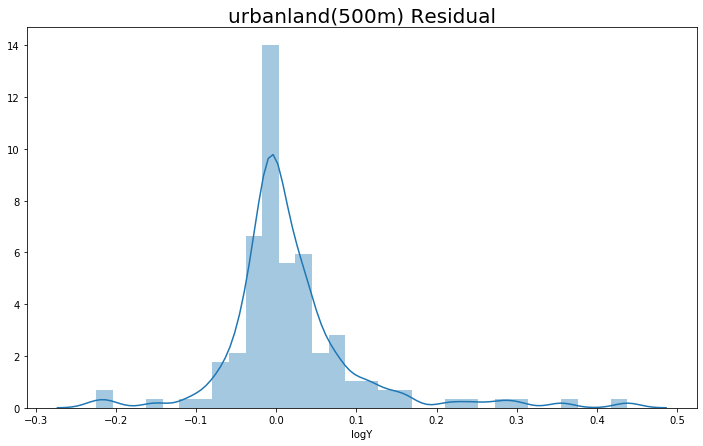

In [216]:
#看實際值及預測值之間的殘差分佈圖
sns.distplot((y_test-predictions))
plt.title('urbanland(500m) Residual',fontsize=20)

In [217]:
#載入迴歸常見的評估指標
from sklearn import metrics

#Mean Absolute Error (MAE)代表平均誤差，公式為所有實際值及預測值相減的絕對值平均。
metrics.mean_absolute_error(y_test,predictions)


0.050834719911752195

In [218]:
#Mean Squared Error 均方差(MSE)比起MSE？可以拉開誤差差距，算是蠻常用的指標，公式所有實際值及預測值相減的平方的平均
#表示誤差的平方的期望值
metrics.mean_squared_error(y_test,predictions)

0.007477810973809465

In [219]:
#Root Mean Squared Error (RMSE)代表MSE的平方根。比起MSE更為常用，因為更容易解釋y。
np.sqrt(metrics.mean_squared_error(y_test,predictions))

0.08647433708222033

In [220]:
def mape_vectorized(a, b): 
    mask = a != 0
    return (np.fabs(a-b)/a)[mask].mean()
Mape = mape_vectorized(y_test, predictions)
Mape

0.013826424046916077

In [221]:
#方差得分
r_squared = lm.score(X_test, y_test)
print(r_squared)
#檢視模型得分
print('模型得分為',round(lm.score(X_test,y_test),4))
#R平方為0.667，表示迴歸模型的總變異中有66.7%可被自變數解釋。
#調整後R平方為0.643，可以去除自變數愈多而使判定係數膨脹的高估現象。

0.34213385316941136
模型得分為 0.3421


In [222]:
adj_r_squared = r_squared - (1 - r_squared) * (X.shape[1] / (X.shape[0] - X.shape[1] - 1))
print(adj_r_squared)

0.3319456606299996


# PCA

In [232]:
features = [ 'land of area','floor','total floor','years of house' , 'Square footage' ,'room','hall','health','compartmented','Management organization','MRT','Factory number in 0.5km','School','convenience store','Distance To Bay','parking space']
X = df500m4 [ features ] #data.drop(['logY''ID'],axis=1)
y = df500m4 [ 'logY' ]

scale = StandardScaler()
normal_X = scale.fit_transform(X) 
X_train, X_test, y_train, y_test = train_test_split(normal_X, y, test_size=0.3, random_state=101)

In [238]:
#主成分PCA分析
# PCA
n_components = 3
pca = TruncatedSVD(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)

X_test_pca = pca.transform(X_test)

前5个主成分解释了数据中90.83%的变化


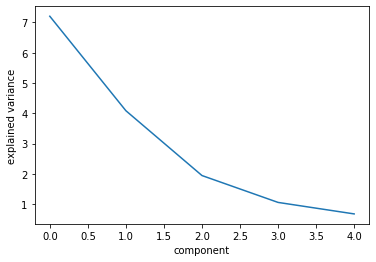

In [239]:
#可視化

components = pca.components_
plt.plot(pca.explained_variance_)
plt.xlabel('component')
plt.ylabel('explained variance')

print("前{}个主成分解释了数据中{:.2f}%的变化".format(n_components, sum(pca.explained_variance_ratio_)*100))

In [240]:
#比較PCA之前與之後線性回歸後的誤差結果比較

model = LinearRegression()
model.fit(X_train_pca, y_train)
print("前{}个PCA主成分进行线性回归的MSE是{}".format(n_components,
                                       metrics.mean_squared_error(y_test,model.predict(X_test_pca))))


前5个PCA主成分进行线性回归的MSE是0.00953200724398901


In [241]:
metrics.mean_absolute_error(y_test,model.predict(X_test_pca))

0.07339412779696501

In [242]:
Mape = mape_vectorized(y_test, model.predict(X_test_pca))
print(Mape)

0.020047005520252025


/Users/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  """


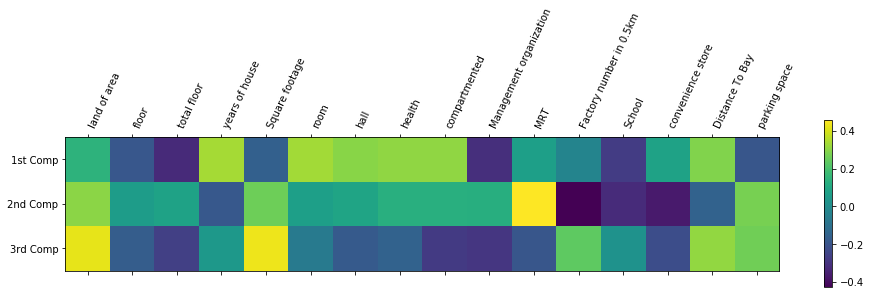

In [1152]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(features)),features,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

In [1153]:
# Dump components relations with features:
import pandas as pd
import pylab as pl
land2=pd.DataFrame(pca.components_,columns=features,index = ['PC-1','PC-2','PC-3'])

land2.to_csv('/Users/caiyunan/Desktop/Result2.csv',float_format='%.5f') #保留两位小数
#print (pd.DataFrame(pca.components_,columns=features,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8']))


# MLP

In [488]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
np.random.seed(7)

/Users/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/anaconda3/lib/python3.6/site-packages/tensorflow/python/fr

### Load dataset

In [489]:
df = pd.read_csv("urban500m.csv")
df.head()

,years of house,building present situation pattern - hall,building present situation pattern - health,Transfer building present situation pattern - compartmented,School,Distance To Bay,parking space,logY
0,42,2,3,1,0.852306,0.830369,0,3.471552
1,3,0,0,0,0.696800,0.835135,1,3.698121
2,14,2,2,1,0.987478,0.089726,0,3.634492
3,14,1,1,1,0.987478,0.089726,0,3.772729
4,14,2,2,1,0.987478,0.089726,0,3.655178


In [490]:
print("dataset shape = ",df.shape)

dataset shape =  (460, 8)


In [491]:
dataset = df.values
np.random.shuffle(dataset) # 把資料集洗牌
#print(dataset)

In [492]:
from sklearn.preprocessing import Normalizer

## Function of normalization and parsing

In [493]:
def normalize(x):
    x-=x.mean(axis=0)
    x/=x.std(axis=0)
    return x

def parseTrainAndTest(x,n):
    return x[:int(round((x.shape[0]*n),0))],x[int(round((x.shape[0]*0.8),0)):]

In [494]:
X = dataset[:,0:-1]
Y = dataset[:,-1]
X = normalize(X)

parseRate = 0.8
X_train, X_test = parseTrainAndTest(X,parseRate)
Y_train, Y_test = parseTrainAndTest(Y,parseRate)

In [495]:
X_train.shape[1]

7

# Function of model building
- 改這裡可以調整神經網路結構
- 透過 model.add(Dense(神經元數量,激發函數)) 來新增隱藏層

In [496]:
def build_model(neural_num):
    model = Sequential()
    model.add(Dense(32,input_shape = (X_train.shape[1],),activation = "tanh")) # hidden layer
    model.add(Dense(neural_num,activation = "relu")) # hidden layer
    model.add(Dense(1)) # output layer
    model.compile(loss="mse",optimizer="adam",metrics=["mae"])
    return model

# Main function
- epochsNum 就是要訓練幾次的意思

## train model

In [501]:
epochsNum = 80
result =[]
for neural_num in range(16,33):
    print("***************** Neural num = ",neural_num,"*****************")
    model = build_model(neural_num)
    #model.summary()
    model.fit(X_train,Y_train,epochs = epochsNum,batch_size = 16,verbose = 0)
    mse,mae = model.evaluate(X_test,Y_test)
    result.append(mae)
    model.save('my_model500relu%d.h5'% neural_num)
print(result)
#print("min value occured in ",result.index(min(result)) ,"neurals",", value is : ",min(result))
print("min value occured in ",result.index(min(result)) +16,"neurals",", value is : ",min(result))

***************** Neural num =  16 *****************
92/92 [==============================] - 0s 3ms/step
***************** Neural num =  17 *****************
92/92 [==============================] - 0s 3ms/step
***************** Neural num =  18 *****************
92/92 [==============================] - 0s 3ms/step
***************** Neural num =  19 *****************
92/92 [==============================] - 0s 3ms/step
***************** Neural num =  20 *****************
92/92 [==============================] - 0s 3ms/step
***************** Neural num =  21 *****************
92/92 [==============================] - 0s 3ms/step
***************** Neural num =  22 *****************
92/92 [==============================] - 0s 4ms/step
***************** Neural num =  23 *****************
92/92 [==============================] - 0s 4ms/step
***************** Neural num =  24 *****************
92/92 [==============================] - 0s 4ms/step
***************** Neural num =  25 ***********

## test model

In [502]:
model = keras.models.load_model('my_model500relu29.h5')
mse,mae = model.evaluate(X_test,Y_test)
Y_pred = model.predict(X_test,batch_size = 10, verbose = 0)
print("Mean square error(MSE)",mse)
print("Mean absolute error(MAE) : ",mae)
#e^0.0753=1.0782萬

92/92 [==============================] - 0s 5ms/step
Mean square error(MSE) 0.007291570548777995
Mean absolute error(MAE) :  0.047800626443779984


# MAPE caculation

In [13]:
def mape_vectorized(a, b): 
    mask = a != 0
    return (np.fabs(a-b)/a)[mask].mean()

In [504]:
Y_test = Y_test.reshape(Y_pred.shape)
#print(Y_pred.shape)
#print(Y_test.shape)
mape = mape_vectorized(Y_test,Y_pred)
print("mape = ",mape)

mape =  0.013266471309819063


## tanh

In [505]:
def build_model(neural_num):
    model = Sequential()
    model.add(Dense(32,input_shape = (X_train.shape[1],),activation = "tanh")) # hidden layer
    model.add(Dense(neural_num,activation = "tanh")) # hidden layer
    model.add(Dense(1)) # output layer
    model.compile(loss="mse",optimizer="adam",metrics=["mae"])
    return model

In [506]:
epochsNum = 80
result =[]
for neural_num in range(16,33):
    print("***************** Neural num = ",neural_num,"*****************")
    model = build_model(neural_num)
    #model.summary()
    model.fit(X_train,Y_train,epochs = epochsNum,batch_size = 16,verbose = 0)
    mse,mae = model.evaluate(X_test,Y_test)
    result.append(mae)
    model.save('my_model500tanh%d.h5'% neural_num)
print(result)
#print("min value occured in ",result.index(min(result)) ,"neurals",", value is : ",min(result))
print("min value occured in ",result.index(min(result)) +16,"neurals",", value is : ",min(result))

***************** Neural num =  16 *****************
92/92 [==============================] - 0s 5ms/step
***************** Neural num =  17 *****************
92/92 [==============================] - 1s 6ms/step
***************** Neural num =  18 *****************
92/92 [==============================] - 1s 6ms/step
***************** Neural num =  19 *****************
92/92 [==============================] - 1s 6ms/step
***************** Neural num =  20 *****************
92/92 [==============================] - 1s 6ms/step
***************** Neural num =  21 *****************
92/92 [==============================] - 1s 6ms/step
***************** Neural num =  22 *****************
92/92 [==============================] - 1s 7ms/step
***************** Neural num =  23 *****************
92/92 [==============================] - 1s 7ms/step
***************** Neural num =  24 *****************
92/92 [==============================] - 1s 7ms/step
***************** Neural num =  25 ***********

## test model

In [509]:
model = keras.models.load_model('my_model500tanh27.h5')
mse,mae = model.evaluate(X_test,Y_test)
Y_pred = model.predict(X_test,batch_size = 10, verbose = 0)
print("Mean square error(MSE)",mse)
print("Mean absolute error(MAE) : ",mae)
#e^0.0753=1.0782萬

92/92 [==============================] - 1s 8ms/step
Mean square error(MSE) 0.006162834353744984
Mean absolute error(MAE) :  0.05303619445666023


In [510]:
Y_test = Y_test.reshape(Y_pred.shape)
#print(Y_pred.shape)
#print(Y_test.shape)
mape = mape_vectorized(Y_test,Y_pred)
print("mape = ",mape)

mape =  0.014716138562280972


# 選取重劃區外圍1000公尺資料

In [31]:
dfkm1=dff[dff.loc[:,"longitude"]> 121.474537] 
dfkm1.shape

(16872, 32)

In [32]:
dfkm2=dfkm1[dfkm1.loc[:,"longitude"]< 121.498264] 
dfkm2.shape

(7612, 32)

In [33]:
dfkm3=dfkm2[dfkm2.loc[:,"latitude"]> 25.000042] 
dfkm3.shape

(5350, 32)

In [34]:
dfkm4=dfkm3[dfkm3.loc[:,"latitude"]< 25.023668] 
dfkm4.shape

(5350, 32)

## 扣除重劃區
#### 將兩dataframe資料相減
dataframe1=dataframe1.append(dataframe2).drop_duplicates(keep=False)

In [35]:
df1000m4=dfkm4.append(dff4).drop_duplicates(keep=False)
df1000m4.shape

(4484, 32)

In [36]:
# 扣除近區
df1000m4=dfkm4.append(dfm4).drop_duplicates(keep=False)
df1000m4.shape

(3982, 32)

Text(0.5, 1.0, 'Distribution of the house price in urbanland(1km)')

<Figure size 432x288 with 0 Axes>

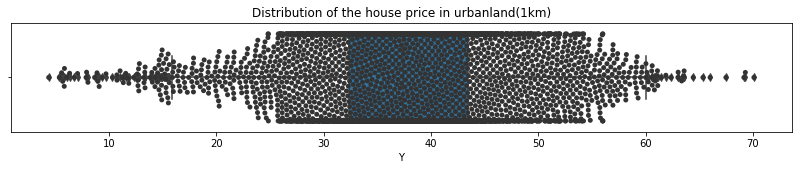

In [37]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(14,2)) 
sns.boxplot(df1000m4.loc[:,"Y"])
sns.swarmplot(df1000m4.loc[:,"Y"], color='.20')
plt.title('Distribution of the house price in urbanland(1km)')

## 離群值處理

In [38]:
# Outlier detection 
import pandas as pd
import numpy as np
from collections import Counter

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(df1000m4,0,['Y'])
#Outliers_to_drop

In [39]:
df1000m4.loc[Outliers_to_drop] # Show the outliers rows

,ID,The villages and towns urban district,transaction sign,building sector house number plate,address,longitude,latitude,land of area,the use zoning or compiles and checks,A.D. transaction year,...,compartmented,Management organization,MRT,Factory number in 0.5km,School,convenience store,Distance To Bay,parking space,Y,logY
520,549,中和區,房地(土地+建物),新北市中和區民有街1~30號,新北市中和區民有里5鄰民有街130號,121.476034,25.002373,8.061625,住,2013/11/13,...,1,0,1.135464,105,0.406830,2,1.867637,0,12.617500,2.611356
628,660,中和區,房地(土地+建物),新北市中和區中山路二段91~120號,新北市中和區積穗里2鄰中山路二段678號,121.480137,25.006097,10.514900,商,2013/11/14,...,0,0,0.530896,321,0.676633,7,1.252852,0,70.095573,4.264025
986,1032,中和區,房地(土地+建物),新北市中和區中山路二段312巷31~60號,新北市中和區福真里30鄰中山路二段312巷55之1號,121.495193,25.004689,8.890475,住,2013/12/12,...,1,0,0.315898,320,0.892314,6,0.056862,0,15.299501,2.791135
1199,1262,中和區,房地(土地+建物),新北市中和區景平路751~780號,新北市中和區福善里34鄰景平路792號,121.496001,25.006057,0.877250,商,2013/12/26,...,1,1,0.433274,159,0.928674,6,0.108835,0,5.663047,1.896577
1300,1369,中和區,房地(土地+建物)+車位,新北市中和區中山路二段211~240號,新北市中和區積穗里2鄰中山路二段678號,121.480137,25.006097,3.445475,住,2013/12/30,...,0,1,0.530896,321,0.676633,7,1.252852,1,14.317680,2.729008
1593,1676,中和區,房地(土地+建物)+車位,新北市中和區建康路1~30號,新北市中和區碧河里23鄰建康路130號,121.489022,25.000102,13.603425,工,2013/12/30,...,1,1,0.568832,749,0.854952,4,0.910208,1,5.348394,1.848202
2219,2354,中和區,房地(土地+建物),新北市中和區民富街64巷1~30號,新北市中和區員山里18鄰民富街64巷8之1號,121.477084,25.007549,7.387050,住,2014/03/18,...,1,0,0.818573,311,0.849508,4,1.413341,0,15.495868,2.803110
2261,2396,中和區,房地(土地+建物),新北市中和區中正路61~90號,新北市中和區員富里4鄰中正路1228號,121.479249,25.011078,6.960525,住,2014/03/26,...,1,0,0.657031,289,0.546247,2,0.978961,0,63.589466,4.168051
3032,3216,中和區,房地(土地+建物)+車位,新北市中和區中山路二段211~240號,新北市中和區積穗里2鄰中山路二段678號,121.480137,25.006097,3.705625,住,2014/06/17,...,0,1,0.530896,321,0.676633,7,1.252852,1,14.633219,2.749398
3267,3467,中和區,房地(土地+建物),新北市中和區民安街42巷34弄1~30號,新北市中和區嘉新里12鄰民安街42巷34弄6號,121.479347,25.001351,11.210650,住,2014/06/23,...,1,0,0.948126,4,0.143654,3,1.654547,0,12.656607,2.614223


In [40]:
# Drop outliers
df1000m4 = df1000m4.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [41]:
df1000m4.shape

(3885, 32)

<Figure size 432x288 with 0 Axes>

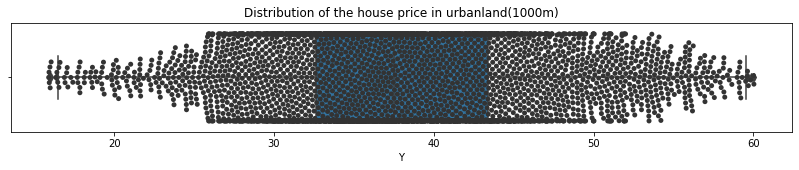

In [42]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(14,2)) 
sns.boxplot(df1000m4.loc[:,"Y"])
sns.swarmplot(df1000m4.loc[:,"Y"], color='.20')
plt.title('Distribution of the house price in urbanland(1000m)')
plt.savefig('中和遠區.png')

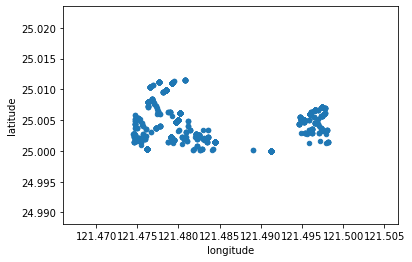

In [44]:
df1000m4.plot(kind="scatter",x="longitude",y="latitude")


## 重劃區與重劃區外圍500m、1000m房屋交易資料地理位置分佈

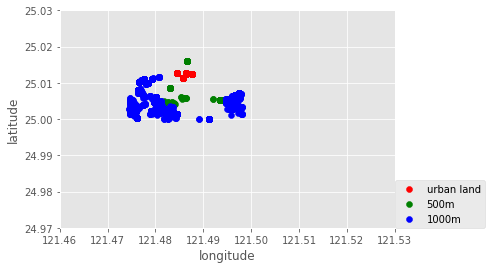

In [50]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
#随机生成两个dataframe


#分别画出scatter图，但是设置不同的颜色
plt.scatter(dff4['longitude'], dff4['latitude'], color='red', label='urban land')
plt.scatter(df500m4['longitude'], df500m4['latitude'], color='green', label='500m')
plt.scatter(df1000m4['longitude'], df1000m4['latitude'], color='blue', label='1000m')
#设置图例
plt.legend(loc=(1, 0))
#设置坐标轴范围
plt.xlim((121.46, 121.53))
plt.ylim((24.97, 25.03))
#设置坐标轴名称
plt.xlabel('longitude')
plt.ylabel('latitude')
#设置坐标轴刻度
my_x_ticks = np.arange(121.46, 121.53, 0.01)
my_y_ticks = np.arange(24.97,25.03, 0.01)
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)

#显示图片
plt.show()

In [43]:
#僅顯示數值型的變數
df1000m4.describe(include=['float'])

,longitude,latitude,land of area,Square footage,MRT,School,Distance To Bay,Y,logY
count,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000
mean,121.485618,25.007050,4.101197,30.833305,0.595099,0.688004,0.792722,38.135814,3.644943
std,0.008163,0.003212,3.097473,18.206373,0.189796,0.205103,0.561739,8.054438,0.213867
min,121.474538,25.000043,0.021175,1.113200,0.086289,0.121708,0.016447,15.900842,2.827363
25%,121.479249,25.006057,1.878525,18.358725,0.433274,0.546247,0.108835,32.617080,3.515034
50%,121.480137,25.006057,3.139950,26.804525,0.653732,0.676633,0.978961,37.484230,3.650249
75%,121.496001,25.011078,6.086300,37.863925,0.657031,0.928674,1.252852,43.406231,3.793380
max,121.498119,25.011595,62.085100,447.461025,1.318883,0.985992,2.049618,60.032418,4.111405


In [487]:
#僅顯示數值型的變數
df1000m4.describe(include=['int'])

,ID,floor,total floor,years of house,room,hall,health,compartmented,Management organization,Factory number in 0.5km,convenience store,parking space
count,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000,3885.00000,3885.000000,3885.000000,3885.000000
mean,9898.185071,9.136680,16.071815,16.600257,2.233205,1.560875,1.407465,0.980952,0.74852,232.747233,4.322008,0.289060
std,5780.766811,6.493965,8.929593,11.361921,1.073594,0.691431,0.598226,0.136710,0.43392,102.453365,2.158747,0.453384
min,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,1.000000,0.000000
25%,4866.000000,4.000000,11.000000,8.000000,1.000000,1.000000,1.000000,1.000000,0.00000,159.000000,2.000000,0.000000
50%,10077.000000,8.000000,14.000000,16.000000,2.000000,2.000000,1.000000,1.000000,1.00000,289.000000,6.000000,0.000000
75%,14992.000000,12.000000,21.000000,22.000000,3.000000,2.000000,2.000000,1.000000,1.00000,289.000000,6.000000,1.000000
max,19702.000000,41.000000,41.000000,47.000000,7.000000,21.000000,5.000000,1.000000,1.00000,749.000000,11.000000,1.000000


In [488]:
#刪除欄位
columns = ['ID','longitude','latitude']
df1000m4=df1000m4.drop(columns, axis=1)

In [489]:
df1000m4.describe().astype(np.int64).T

,count,mean,std,min,25%,50%,75%,max
land of area,3885,4,3,0,1,3,6,62
floor,3885,9,6,1,4,8,12,41
total floor,3885,16,8,3,11,14,21,41
years of house,3885,16,11,0,8,16,22,47
Square footage,3885,30,18,1,18,26,37,447
room,3885,2,1,0,1,2,3,7
hall,3885,1,0,0,1,2,2,21
health,3885,1,0,0,1,1,2,5
compartmented,3885,0,0,0,1,1,1,1
Management organization,3885,0,0,0,0,1,1,1


In [490]:
#刪除欄位
columns = ['Y']
df1000m4=df1000m4.drop(columns, axis=1)
df1000m4

,The villages and towns urban district,transaction sign,building sector house number plate,address,land of area,the use zoning or compiles and checks,A.D. transaction year,transaction pen number,floor,total floor,...,health,compartmented,Management organization,MRT,Factory number in 0.5km,School,convenience store,Distance To Bay,parking space,logY
0,中和區,房地(土地+建物)+車位,新北市中和區中山路二段301~330號,新北市中和區積穗里2鄰中山路二段678號,2.084225,工,2013/10/21,土地1建物1車位1,10,12,...,0,0,1,0.530896,321,0.676633,7,1.252852,1,3.430401
1,中和區,房地(土地+建物),新北市中和區中正路661~690號,新北市中和區員富里4鄰中正路1228號,1.276550,住,2013/10/04,土地1建物1車位0,22,22,...,1,1,1,0.657031,289,0.546247,2,0.978961,0,3.630151
2,中和區,房地(土地+建物),新北市中和區中正路151~180號,新北市中和區員富里4鄰中正路1228號,2.247575,住,2013/10/13,土地2建物1車位0,2,14,...,1,1,1,0.657031,289,0.546247,2,0.978961,0,3.659232
3,中和區,房地(土地+建物)+車位,新北市中和區中正路271~300號,新北市中和區員富里4鄰中正路1228號,6.897000,住,2013/09/11,土地1建物1車位1,7,11,...,2,1,1,0.657031,289,0.546247,2,0.978961,1,3.570126
4,中和區,房地(土地+建物),新北市中和區永和路1~30號,新北市中和區中原里16鄰永和路126號,1.802900,住,2013/10/14,土地2建物1車位0,15,16,...,1,1,1,0.496771,49,0.937717,6,0.205372,0,3.778218
5,中和區,房地(土地+建物),新北市中和區中正路601~630號,新北市中和區員富里4鄰中正路1228號,5.493400,住,2013/10/15,土地1建物1車位0,4,5,...,1,1,0,0.657031,289,0.546247,2,0.978961,0,3.328139
6,中和區,房地(土地+建物)+車位,新北市中和區中正路211~240號,新北市中和區員富里4鄰中正路1228號,2.613600,住,2013/09/18,土地2建物2車位1,7,16,...,2,1,1,0.657031,289,0.546247,2,0.978961,1,3.660709
7,中和區,房地(土地+建物)+車位,新北市中和區員山路391~420號,新北市中和區員富里10鄰員山路597號,7.033125,住,2013/09/25,土地1建物1車位1,4,7,...,2,1,0,0.691411,315,0.699232,2,1.127421,1,3.302813
8,中和區,房地(土地+建物),新北市中和區中正路811~840號,新北市中和區員富里4鄰中正路1228號,2.707375,住,2013/09/21,土地2建物1車位0,11,22,...,2,1,1,0.657031,289,0.546247,2,0.978961,0,3.632591
9,中和區,房地(土地+建物)+車位,新北市中和區中正路331~360號,新北市中和區員富里4鄰中正路1228號,5.929000,住,2013/10/16,土地1建物1車位1,5,21,...,2,1,1,0.657031,289,0.546247,2,0.978961,1,3.557235


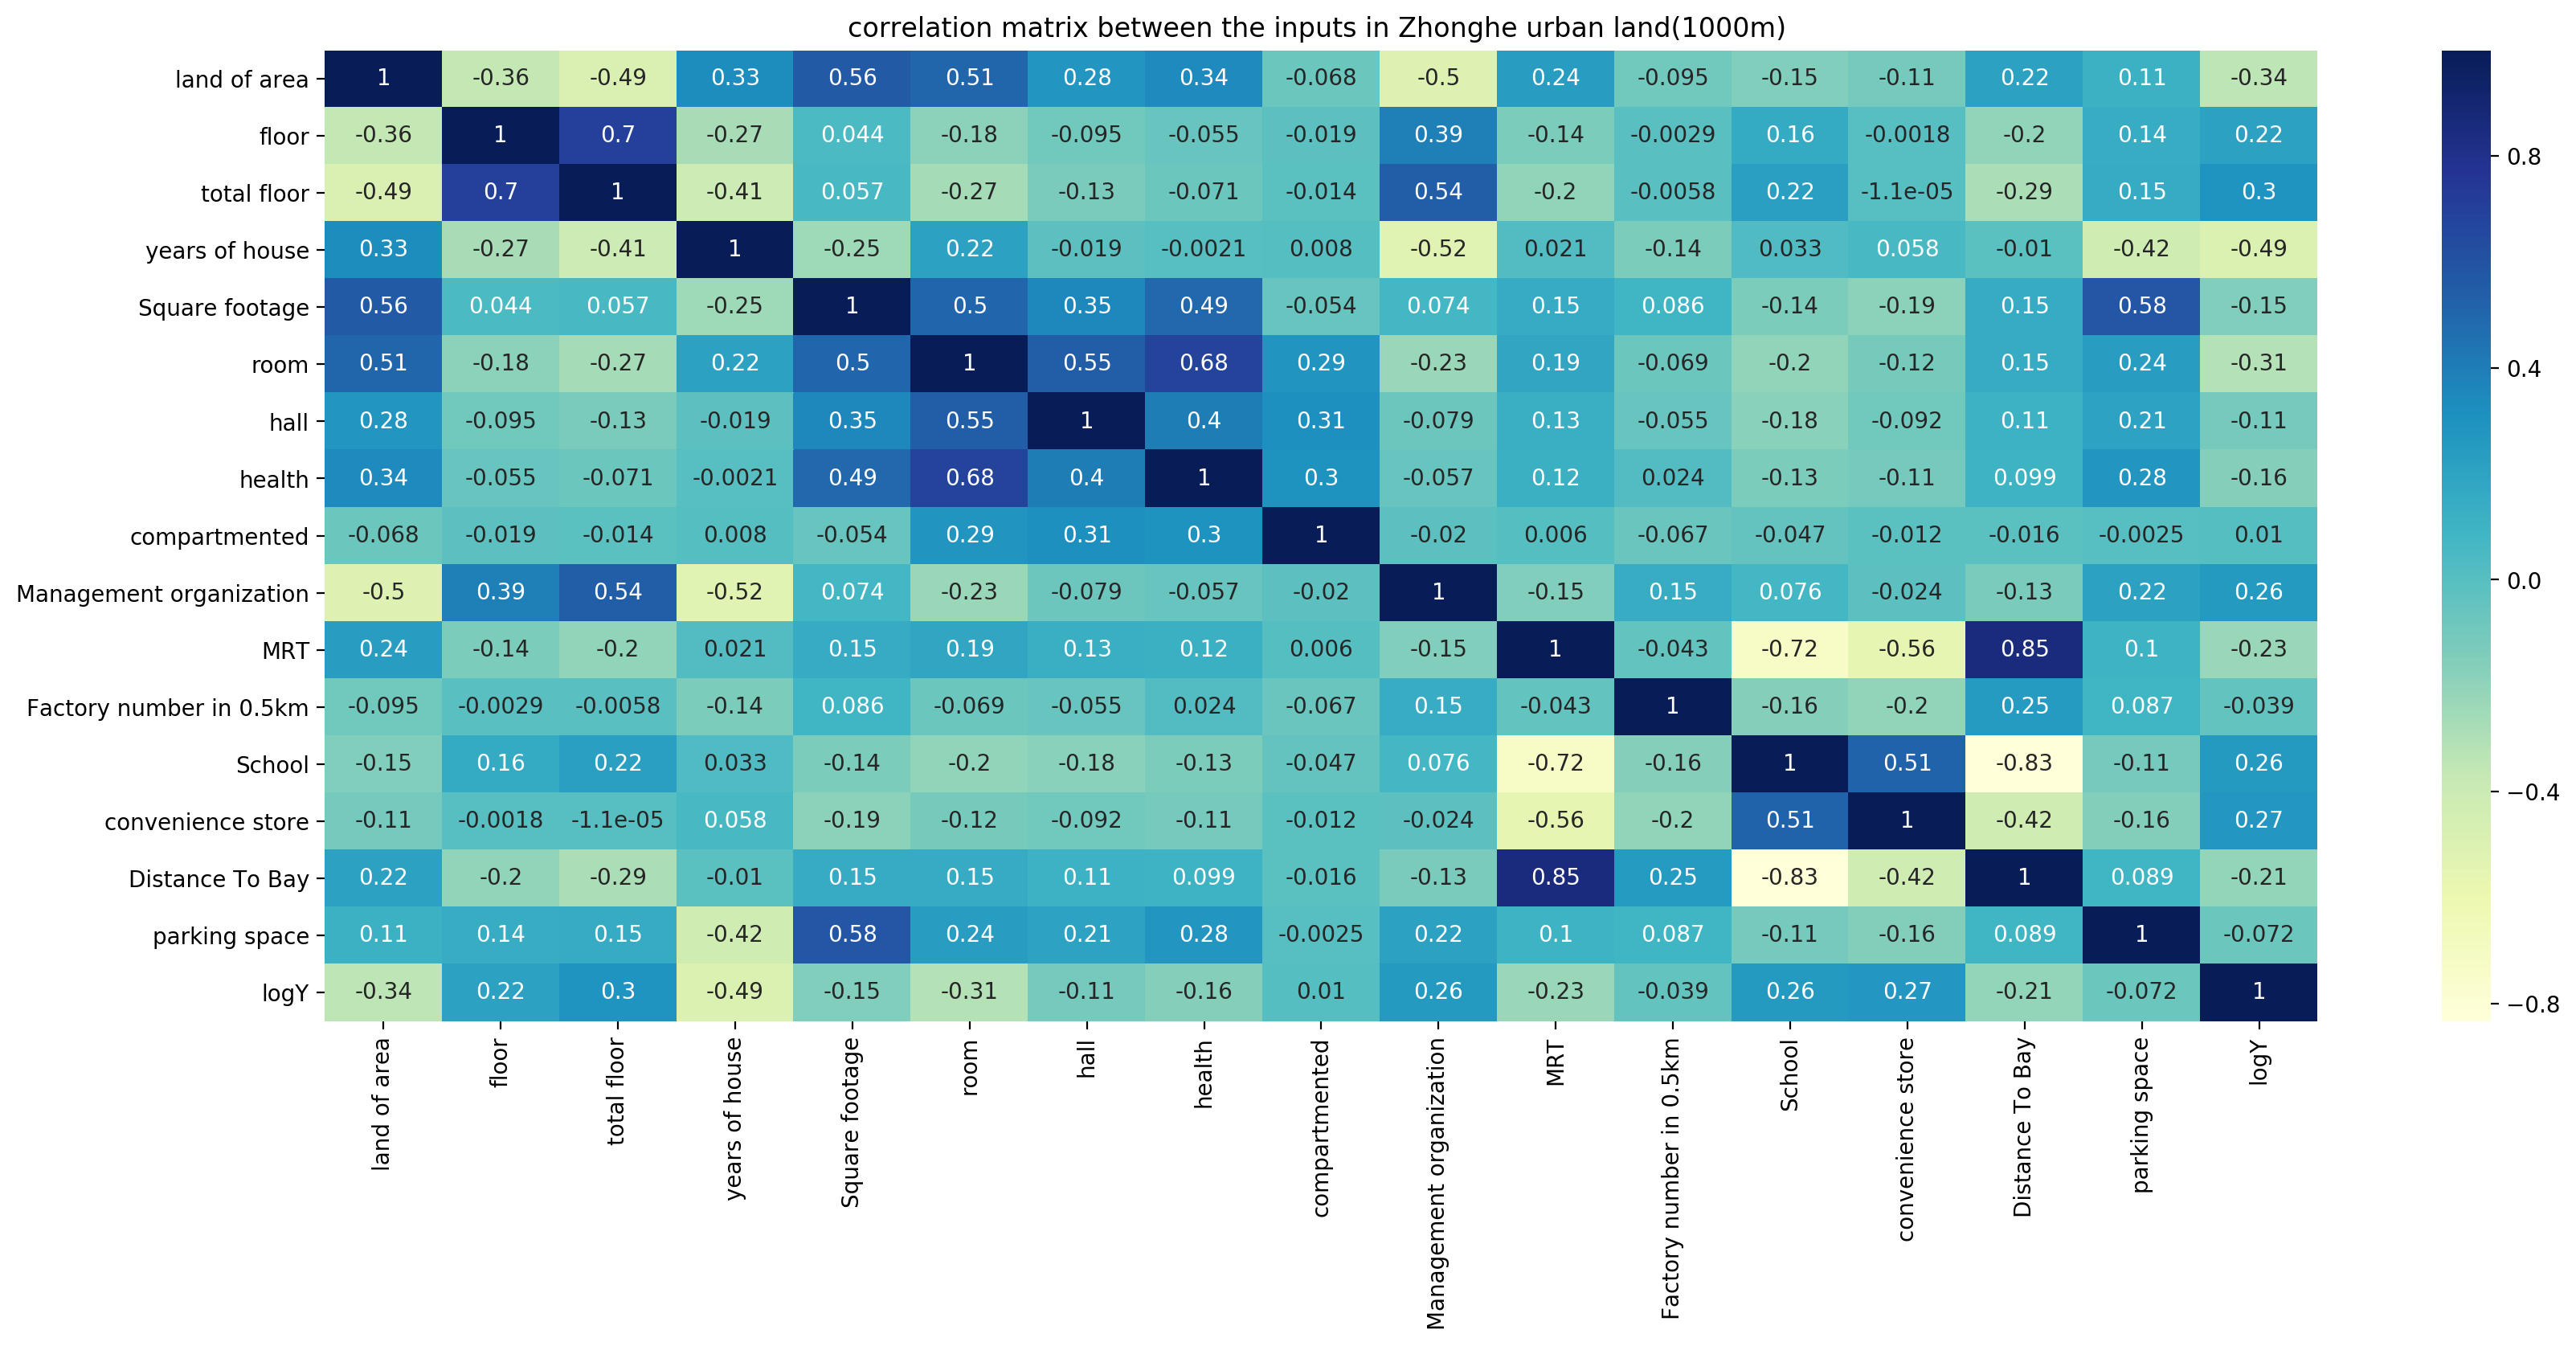

In [492]:
fig, ax = plt.subplots(figsize=(20,8), dpi=200)
sns.heatmap(df1000m4.loc[:,'land of area':'logY'].corr(), cmap="YlGnBu",annot=True)
plt.title('correlation matrix between the inputs in Zhonghe urban land(1000m) ')
plt.savefig('Banqiao1.png')

## 線性迴歸

In [260]:
features = [ 'land of area','floor','total floor','years of house' , 'Square footage' ,'room','hall','health','compartmented','Management organization','MRT','Factory number in 0.5km','School','convenience store','Distance To Bay','parking space']
X = df1000m4 [ features ] #data.drop(['logY''ID'],axis=1)
y = df1000m4 [ 'logY' ]
#將資料分成訓練組及測試組
from sklearn.model_selection import train_test_split

#test_size代表測試組比例。random_state代表設定隨機種子，讓測試結果可被重複
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [261]:
print('No. of training data:', len(X_train))
print('No. of test data:', len(X_test))

No. of training data: 2719
No. of test data: 1166


In [262]:
import statsmodels.api as sm
from sklearn import preprocessing
predictor = sm.add_constant(X_train)# adding a constant添加常數
OLS = sm.OLS(y_train,predictor)
myfit = OLS.fit()
print(myfit.summary())

                            OLS Regression Results                            
Dep. Variable:                   logY   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     136.6
Date:                Sat, 18 Jan 2020   Prob (F-statistic):               0.00
Time:                        16:54:38   Log-Likelihood:                 1173.9
No. Observations:                2719   AIC:                            -2314.
Df Residuals:                    2702   BIC:                            -2213.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

/Users/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [264]:
#載入線性迴歸，並訓練模型
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print('Intercept: \n', lm.intercept_)
print('Coefficients: \n', lm.coef_)

Intercept: 
 3.564607755295744
Coefficients: 
 [ 3.46005596e-03  1.90285588e-03  1.99222510e-03 -1.15609793e-02
 -1.75573591e-03 -5.89890687e-03  1.30943542e-02 -4.88438280e-03
  4.98111419e-02 -2.94627417e-02 -1.73114955e-03 -7.78625841e-05
  2.52317141e-01  1.67531818e-02  5.11181404e-02 -1.09922685e-01]


## 刪掉未顯著的變數

In [265]:
features = [ 'floor','total floor','years of house' , 'Square footage' ,'hall','compartmented','Management organization','School','convenience store','Distance To Bay','parking space']
X = df1000m4 [ features ] #data.drop(['logY''ID'],axis=1)
y = df1000m4 [ 'logY' ]

In [266]:
features

['floor',
 'total floor',
 'years of house',
 'Square footage',
 'hall',
 'compartmented',
 'Management organization',
 'School',
 'convenience store',
 'Distance To Bay',
 'parking space']

In [267]:
#test_size代表測試組比例。random_state代表設定隨機種子，讓測試結果可被重複
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#載入線性迴歸，並訓練模型
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
#取得截距。如果公式是y=a+bx，a即是截距
print(lm.intercept_)
print(lm.coef_ )

3.5692423885724076
[ 0.00180513  0.00182495 -0.01149652 -0.00156631  0.01030408  0.03249079
 -0.03815296  0.24888987  0.0172461   0.04640763 -0.11393158]


In [268]:
#取得迴歸係數，並用Data Frame顯示
lm.coef_
X_train.columns
cdf = pd.DataFrame(lm.coef_,X_train.columns,columns=['Coef'])
cdf

,Coef
floor,0.001805
total floor,0.001825
years of house,-0.011497
Square footage,-0.001566
hall,0.010304
compartmented,0.032491
Management organization,-0.038153
School,0.248890
convenience store,0.017246
Distance To Bay,0.046408


### 使用測試組資料來預測結果(對測試數據進行預測)

In [269]:
predictions = lm.predict(X_test)
#predictions

In [270]:
#檢查實際值和預測值之間的差異
dfpredictions = pd.DataFrame({'Actual':y_test,'Predicted':predictions})
dfplot=dfpredictions.head(25)
dfplot

,Actual,Predicted
2805,3.870277,3.847392
3256,3.686948,3.669732
1894,3.310644,3.591576
1408,3.610869,3.545803
1915,3.779956,3.773217
2094,3.871127,3.634757
2854,3.821122,3.728899
3449,3.654079,3.663091
2588,3.286447,3.448646
3613,3.533713,3.403268


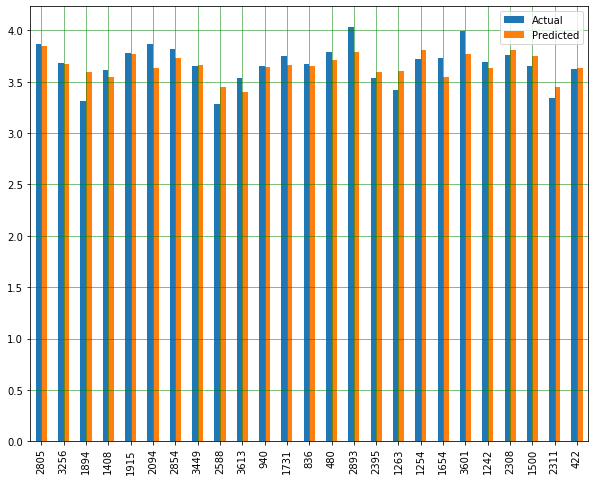

In [271]:
#我們繪製實際值和預測值的比較
dfplot.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

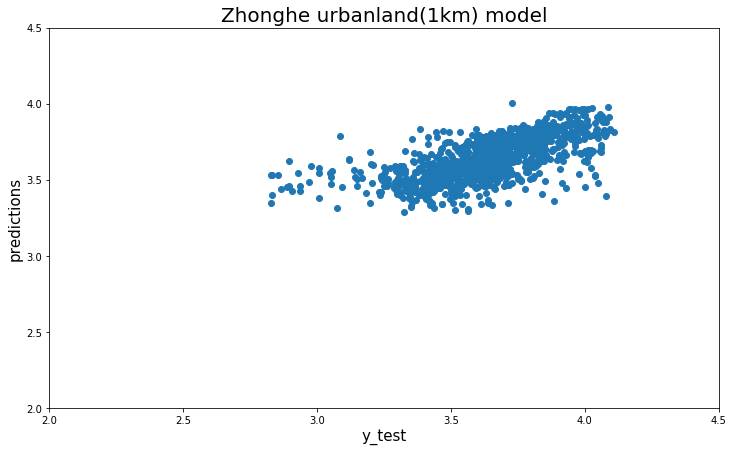

In [272]:
#比較實際房價及預測房價的關係
plt.scatter(y_test,predictions)
plt.xlabel('y_test',fontsize=15)
plt.ylabel('predictions',fontsize=15)
plt.xlim([2.0, 4.5])
plt.ylim([2.0, 4.5])
plt.title('Zhonghe urbanland(1km) model',fontsize=20)
plt.savefig('Zhonghe urbanland(1km).png')

Text(0.5, 1.0, 'Zhonghe urbanland(1km) Residual')

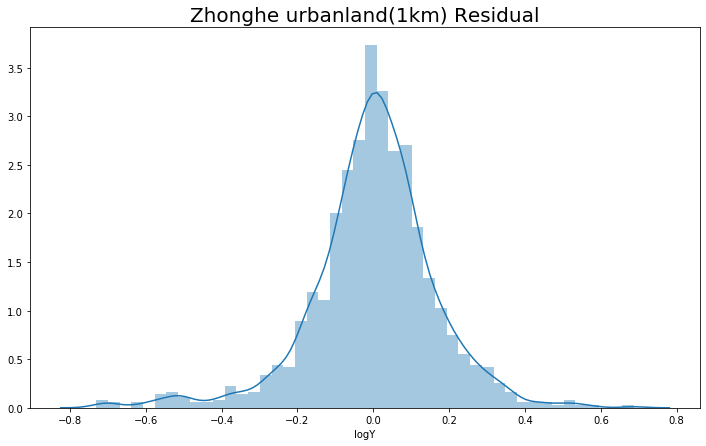

In [273]:
#看實際值及預測值之間的殘差分佈圖
sns.distplot((y_test-predictions))
plt.title('Zhonghe urbanland(1km) Residual',fontsize=20)
#殘差成常態

In [274]:
#載入迴歸常見的評估指標
from sklearn import metrics

#Mean Absolute Error (MAE)代表平均誤差，公式為所有實際值及預測值相減的絕對值平均。
metrics.mean_absolute_error(y_test,predictions)


0.11802630651205127

In [275]:
#Mean Squared Error 均方差(MSE)比起MSE？可以拉開誤差差距，算是蠻常用的指標，公式所有實際值及預測值相減的平方的平均
#表示誤差的平方的期望值
metrics.mean_squared_error(y_test,predictions)

0.027500432784826855

In [276]:
#Root Mean Squared Error (RMSE)代表MSE的平方根。比起MSE更為常用，因為更容易解釋y。
np.sqrt(metrics.mean_squared_error(y_test,predictions))

0.16583254440798662

In [277]:
def mape_vectorized(a, b): 
    mask = a != 0
    return (np.fabs(a-b)/a)[mask].mean()
Mape = mape_vectorized(y_test, predictions)
Mape

0.03312242097044326

In [278]:
#方差得分
r_squared = lm.score(X_test, y_test)
print(r_squared)
#檢視模型得分
#print('模型得分為',round(model.score(X_test,y_test),4))
adj_r_squared = r_squared - (1 - r_squared) * (X.shape[1] / (X.shape[0] - X.shape[1] - 1))
print(adj_r_squared)

0.4295367284687096
0.42791651261876273


# PCA

In [327]:
features = [ 'land of area','floor','total floor','years of house' , 'Square footage' ,'room','hall','health','compartmented','Management organization','MRT','Factory number in 0.5km','School','convenience store','Distance To Bay','parking space']
X = df1000m4 [ features ] #data.drop(['logY''ID'],axis=1)
y = df1000m4 [ 'logY' ]

scale = StandardScaler()
normal_X = scale.fit_transform(X) 
X_train, X_test, y_train, y_test = train_test_split(normal_X, y, test_size=0.3, random_state=101)

In [335]:
#主成分PCA分析
# PCA
n_components = 4
pca = TruncatedSVD(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)

X_test_pca = pca.transform(X_test)

前10个主成分解释了数据中91.70%的变化


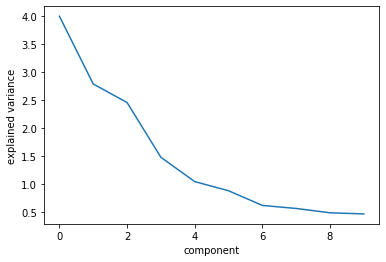

In [336]:
#可視化

components = pca.components_
plt.plot(pca.explained_variance_)
plt.xlabel('component')
plt.ylabel('explained variance')

print("前{}个主成分解释了数据中{:.2f}%的变化".format(n_components, sum(pca.explained_variance_ratio_)*100))

In [337]:
#比較PCA之前與之後線性回歸後的誤差結果比較

model = LinearRegression()
model.fit(X_train_pca, y_train)
print("前{}个PCA主成分进行线性回归的MSE是{}".format(n_components,
                                       metrics.mean_squared_error(y_test,model.predict(X_test_pca))))


前10个PCA主成分进行线性回归的MSE是0.030804285979845646


In [338]:
metrics.mean_absolute_error(y_test,model.predict(X_test_pca))

0.12729821357380303

In [339]:
Mape = mape_vectorized(y_test, model.predict(X_test_pca))
print(Mape)

0.03559420246903641


/Users/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  """


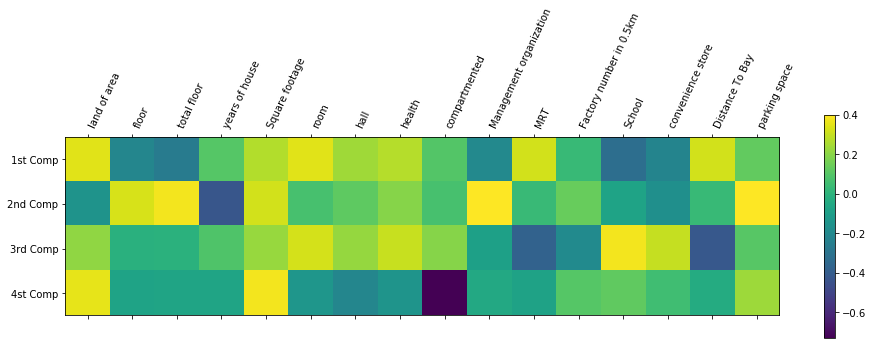

In [1325]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3],['1st Comp','2nd Comp','3rd Comp','4st Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(features)),features,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

In [1212]:
# Dump components relations with features:
import pandas as pd
import pylab as pl
land3=pd.DataFrame(pca.components_,columns=features,index = ['PC-1','PC-2','PC-3','PC-4'])

land3.to_csv('/Users/caiyunan/Desktop/Result3.csv',float_format='%.5f') #保留两位小数
#print (pd.DataFrame(pca.components_,columns=features,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8']))


# MLP

In [20]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
np.random.seed(7)

In [21]:
df = pd.read_csv("urban1000m.csv")
df.head()

,floor,total floor,years of house,Square footage,building present situation pattern - hall,Transfer building present situation pattern - compartmented,Transfer Management organization,School,0.257-11,Distance To Bay,parking space,logY
0,10,12,5,20.007350,0,0,1,0.676633,7,1.252852,1,3.430401
1,22,22,14,17.865650,1,1,1,0.546247,2,0.978961,0,3.630151
2,2,14,8,21.807225,1,1,1,0.546247,2,0.978961,0,3.659232
3,7,11,2,50.983350,2,1,1,0.546247,2,0.978961,1,3.570126
4,15,16,15,14.039025,1,1,1,0.937717,6,0.205372,0,3.778218


In [22]:
print("dataset shape = ",df.shape)

dataset shape =  (3885, 12)


In [23]:
dataset = df.values
np.random.shuffle(dataset) # 把資料集洗牌
#print(dataset)

In [24]:
from sklearn.preprocessing import Normalizer

## Function of normalization and parsing

In [25]:
def normalize(x):
    x-=x.mean(axis=0)
    x/=x.std(axis=0)
    return x

def parseTrainAndTest(x,n):
    return x[:int(round((x.shape[0]*n),0))],x[int(round((x.shape[0]*0.8),0)):]

In [26]:
X = dataset[:,0:-1]
Y = dataset[:,-1]
X = normalize(X)

parseRate = 0.8
X_train, X_test = parseTrainAndTest(X,parseRate)
Y_train, Y_test = parseTrainAndTest(Y,parseRate)

In [27]:
X_train.shape[1]

11

# Function of model building
- 改這裡可以調整神經網路結構
- 透過 model.add(Dense(神經元數量,激發函數)) 來新增隱藏層

In [28]:
def build_model(neural_num):
    model = Sequential()
    model.add(Dense(32,input_shape = (X_train.shape[1],),activation = "relu")) # hidden layer
    model.add(Dense(neural_num,activation = "relu")) # hidden layer
    model.add(Dense(1)) # output layer
    model.compile(loss="mse",optimizer="adam",metrics=["mae"])
    return model

# Main function
- epochsNum 就是要訓練幾次的意思

## train model

In [34]:
epochsNum = 80
result =[]
for neural_num in range(16,33):
    print("***************** Neural num = ",neural_num,"*****************")
    model = build_model(neural_num)
    #model.summary()
    model.fit(X_train,Y_train,epochs = epochsNum,batch_size = 16,verbose = 0)
    mse,mae = model.evaluate(X_test,Y_test)
    result.append(mae)
    model.save('my_model1kmrelu%d.h5'% neural_num)
print(result) 
#print("min value occured in ",result.index(min(result)) ,"neurals",", value is : ",min(result))
print("min value occured in ",result.index(min(result)) +16,"neurals",", value is : ",min(result))

***************** Neural num =  16 *****************
777/777 [==============================] - 1s 2ms/step
***************** Neural num =  17 *****************
777/777 [==============================] - 1s 2ms/step
***************** Neural num =  18 *****************
777/777 [==============================] - 1s 2ms/step
***************** Neural num =  19 *****************
777/777 [==============================] - 1s 2ms/step
***************** Neural num =  20 *****************
777/777 [==============================] - 1s 2ms/step
***************** Neural num =  21 *****************
777/777 [==============================] - 1s 2ms/step
***************** Neural num =  22 *****************
777/777 [==============================] - 1s 2ms/step
***************** Neural num =  23 *****************
777/777 [==============================] - 1s 2ms/step
***************** Neural num =  24 *****************
777/777 [==============================] - 1s 2ms/step
***************** Neural num

## test model

In [30]:
model = keras.models.load_model('my_model1kmrelu23.h5')
mse,mae = model.evaluate(X_test,Y_test)
Y_pred = model.predict(X_test,batch_size = 10, verbose = 0)
print("Mean square error(MSE)",mse)
print("Mean absolute error(MAE) : ",mae)

777/777 [==============================] - 1s 945us/step
Mean square error(MSE) 0.01869185200318253
Mean absolute error(MAE) :  0.09737983081331585


# MAPE caculation

In [31]:
Y_test = Y_test.reshape(Y_pred.shape)
#print(Y_pred.shape)
#print(Y_test.shape)
mape = mape_vectorized(Y_test,Y_pred)
print("mape = ",mape)

mape =  0.027226728406673194


# tanh

In [35]:
def build_model(neural_num):
    model = Sequential()
    model.add(Dense(32,input_shape = (X_train.shape[1],),activation = "tanh")) # hidden layer
    model.add(Dense(neural_num,activation = "tanh")) # hidden layer
    model.add(Dense(1)) # output layer
    model.compile(loss="mse",optimizer="adam",metrics=["mae"])
    return model

In [36]:
epochsNum = 80
result =[]
for neural_num in range(16,33):
    print("***************** Neural num = ",neural_num,"*****************")
    model = build_model(neural_num)
    #model.summary()
    model.fit(X_train,Y_train,epochs = epochsNum,batch_size = 16,verbose = 0)
    mse,mae = model.evaluate(X_test,Y_test)
    result.append(mae)
    model.save('my_modeltanh1km%d.h5'% neural_num)
print(result) 
#print("min value occured in ",result.index(min(result)) ,"neurals",", value is : ",min(result))
print("min value occured in ",result.index(min(result)) +16,"neurals",", value is : ",min(result))

***************** Neural num =  16 *****************
777/777 [==============================] - 2s 2ms/step
***************** Neural num =  17 *****************
777/777 [==============================] - 2s 2ms/step
***************** Neural num =  18 *****************
777/777 [==============================] - 2s 2ms/step
***************** Neural num =  19 *****************
777/777 [==============================] - 2s 2ms/step
***************** Neural num =  20 *****************
777/777 [==============================] - 2s 2ms/step
***************** Neural num =  21 *****************
777/777 [==============================] - 2s 2ms/step
***************** Neural num =  22 *****************
777/777 [==============================] - 2s 2ms/step
***************** Neural num =  23 *****************
777/777 [==============================] - 2s 2ms/step
***************** Neural num =  24 *****************
777/777 [==============================] - 2s 2ms/step
***************** Neural num

In [37]:
model = keras.models.load_model('my_modeltanh1km31.h5')
mse,mae = model.evaluate(X_test,Y_test)
Y_pred = model.predict(X_test,batch_size = 10, verbose = 0)
print("Mean square error(MSE)",mse)
print("Mean absolute error(MAE) : ",mae)

777/777 [==============================] - 2s 2ms/step
Mean square error(MSE) 0.019287304229976817
Mean absolute error(MAE) :  0.0974611521169946


In [38]:
Y_test = Y_test.reshape(Y_pred.shape)
#print(Y_pred.shape)
#print(Y_test.shape)
mape = mape_vectorized(Y_test,Y_pred)
print("mape = ",mape)

mape =  0.02725184903752659


## 中和model放板橋test


In [51]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
np.random.seed(7)

/Users/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/anaconda3/lib/python3.6/site-packages/tensorflow/python/fr

In [69]:
trainFileName = "allurbanland.csv"
testFileName = "allbanurbanland.csv"
df_train = pd.read_csv(trainFileName)
df_train.head()
df_test = pd.read_csv(testFileName)
df_test.head()

,land of area,floor,total floor,years of house,Square footage,Building present situation pattern - room,building present situation pattern - hall,building present situation pattern - health,Transfer building present situation pattern - compartmented,Transfer Management organization,MRT,Factory number in 0.5km,School,0.257-11,Distance To Bay,parking space,logY
0,1.672825,4,13,0,15.152225,3,1,2,1,1,0.316568,6,0.410504,5,0.255703,1,3.392722
1,3.375900,2,15,0,39.328025,3,2,2,1,1,0.446016,4,0.163211,3,0.271327,0,3.394557
2,2.014650,6,17,0,22.109725,3,1,2,1,1,0.220733,6,0.287217,6,0.407186,1,3.434557
3,1.887600,8,19,2,30.839875,0,0,0,0,1,0.734726,6,0.552226,0,0.091119,1,3.522810
4,1.775675,3,19,2,30.479900,0,0,0,0,1,0.734726,6,0.552226,0,0.091119,1,3.575470


In [70]:
print("Training dataset shape = ",df_train.shape)
print("Testing dataset shape = ",df_test.shape)

Training dataset shape =  (866, 17)
Testing dataset shape =  (884, 17)


In [71]:
dataset_train = df_train.values
np.random.shuffle(dataset_train) # 把資料集洗牌
#print(dataset_train)
dataset_test = df_test.values
np.random.shuffle(dataset_test) # 把資料集洗牌
#print(dataset_train)

In [72]:
def normalize(x):
    x-=x.mean(axis=0)
    x/=x.std(axis=0)
    return x

def parseTrainAndTest(x,n):
    return x[:int(round((x.shape[0]*n),0))],x[int(round((x.shape[0]*0.8),0)):]

In [73]:
X_train = dataset_train[:,0:-1]
Y_train = dataset_train[:,-1]
X_train = normalize(X_train)

X_test = dataset_test[:,0:-1]
Y_test = dataset_test[:,-1]
X_test = normalize(X_test)
#parseRate = 0.8
#X_train, X_test = parseTrainAndTest(X,parseRate)
#Y_train, Y_test = parseTrainAndTest(Y,parseRate)

In [74]:
print("number of features in training set : ",X_train.shape[1])
print("number of features in testing set : ",X_test.shape[1])

number of features in training set :  16
number of features in testing set :  16


In [75]:
def build_model(neural_num):
    model = Sequential()
    model.add(Dense(neural_num,input_shape = (X_train.shape[1],),activation = "relu")) # hidden layer
    model.add(Dense(neural_num,activation = "relu")) # hidden layer
    model.add(Dense(1)) # output layer
    model.compile(loss="mse",optimizer="adam",metrics=["mae"])
    return model

In [76]:
epochsNum = 80
result =[]
for neural_num in range(16,20):
    print("***************** Neural num = ",neural_num,"*****************")
    model = build_model(neural_num)
    #model.summary()
    model.fit(X_train,Y_train,epochs = epochsNum,batch_size = 16,verbose = 0)
    mse,mae = model.evaluate(X_test,Y_test)
    result.append(mae)
    model.save('my_model%d.h5'% neural_num)
#print(result.index(min(result))) 
print("min value occured in ",result.index(min(result)) +16,"neurals",", value is : ",min(result))

W0102 14:27:36.523396 4522511808 deprecation_wrapper.py:119] From /Users/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0102 14:27:36.569108 4522511808 deprecation_wrapper.py:119] From /Users/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0102 14:27:36.590357 4522511808 deprecation_wrapper.py:119] From /Users/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0102 14:27:36.637320 4522511808 deprecation_wrapper.py:119] From /Users/anaconda3/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



***************** Neural num =  16 *****************


W0102 14:27:37.076357 4522511808 deprecation_wrapper.py:119] From /Users/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0102 14:27:37.148691 4522511808 deprecation_wrapper.py:119] From /Users/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



884/884 [==============================] - 0s 41us/step
***************** Neural num =  17 *****************
884/884 [==============================] - 0s 47us/step
***************** Neural num =  18 *****************
884/884 [==============================] - 0s 66us/step
***************** Neural num =  19 *****************
884/884 [==============================] - 0s 75us/step
min value occured in  17 neurals , value is :  0.663653023911817


In [77]:
model = keras.models.load_model('my_model18.h5')
mse,mae = model.evaluate(X_test,Y_test)
Y_pred = model.predict(X_test,batch_size = 10, verbose = 0)
print("Mean square error(MSE)",mse)
print("Mean absolute error(MAE) : ",mae)

884/884 [==============================] - 0s 91us/step
Mean square error(MSE) 1.4300810557145338
Mean absolute error(MAE) :  0.9288425909447994


In [78]:
def mape_vectorized(a, b): 
    mask = a != 0
    return (np.fabs(a-b)/a)[mask].mean()

In [79]:
Y_test = Y_test.reshape(Y_pred.shape)
#print(Y_pred.shape)
#print(Y_test.shape)
mape = mape_vectorized(Y_test,Y_pred)
print("mape = ",mape)

mape =  0.24175741834754938
